> In order to build our forecasting model, we will have to opt for using CRISP-DM methodology.

**1. Business understanding**

This first step is essentially about understanding the business, the need for the specific project and the resources that we have. 

1.1 **Gather background information**

 *Compiling the business background *

this project is about historical weather around Szeged, Hungary , from 2006 to 2016

**Defining business objectives**

Make data more accessible and understandable for everyone.

Provide fast analytics for the different Factors Affecting Weather .

use different prediction and classification algorithms

calculating and comparing evaluation measures



**1.2 Assessing the situation**

** Resource Inventory **

Data : dataset contains in a practical format 10 years (2006-2016) of hourly data in just a single file.

Computing resources : hp , i3 processor, 4 GB RAM

Programming languages and libraries : python ( Numpy, pandas, matplotlib, seaborn, tensorflow, scikitlearn)

**1.3 Objective of the project**

 the objective of this project is to analyze the weather data and extract the hypotheses to arrive at a prediction

**2.Collect initial data**

Dataset from Kaggle : https://www.kaggle.com/budincsevity/szeged-weather

**2.1 Data Exploration**

Exploration is to understand how all these columns are related and the value structures so the correlation between these data

**importing libraries **

In [1]:
#Data manipulation libraries : 
import numpy as np  #numpy
import pandas as pd  #pandas
import tensorflow as tf
#System libraries
import glob #The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell

#Map plotting 
import folium #Interactive Maps viz



#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#math operations lib 
import math
from math import pi

#date manipulation 
import datetime as dt

#Missing data detector lib
import missingno as mn

#Impute missing data
from sklearn.impute  import SimpleImputer as Imputer 

#Deep learning with keras
from keras import backend as K
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

#Splitting data to test and train 
from sklearn.model_selection import train_test_split

import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow import keras
%matplotlib inline
plt.style.use('seaborn-whitegrid')

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from collections import Counter
import time
import datetime as dt
from datetime import datetime
import collections
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib.pyplot import rcParams

from sklearn import linear_model

C:\anaconda\data\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\anaconda\data\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\anaconda\data\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\anaconda\data\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a syn

In [2]:
from datetime import datetime

In [3]:
data = pd.read_csv('weatherHistory.csv', nrows=1464, parse_dates=[0])
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
len(data)

1464

In [5]:
data.tail(100)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
1364,2006-08-05 20:00:00+02:00,Partly Cloudy,rain,19.055556,19.055556,0.73,6.9069,288.0,11.0285,0.0,1010.35,Partly cloudy until evening.
1365,2006-08-05 21:00:00+02:00,Partly Cloudy,rain,17.250000,17.250000,0.81,4.8783,261.0,11.2056,0.0,0.00,Partly cloudy until evening.
1366,2006-08-05 22:00:00+02:00,Clear,rain,16.161111,16.161111,0.86,8.3398,270.0,9.9820,0.0,0.00,Partly cloudy until evening.
1367,2006-08-05 23:00:00+02:00,Clear,rain,15.327778,15.327778,0.89,6.3756,255.0,14.9569,0.0,1011.69,Partly cloudy until evening.
1368,2006-08-06 00:00:00+02:00,Clear,rain,13.988889,13.988889,0.92,9.7405,270.0,9.9820,0.0,0.00,Partly cloudy starting in the morning.
...,...,...,...,...,...,...,...,...,...,...,...,...
1459,2006-08-09 19:00:00+02:00,Partly Cloudy,rain,23.888889,23.888889,0.50,12.5258,299.0,11.2056,0.0,1009.34,Partly cloudy starting in the morning.
1460,2006-08-09 20:00:00+02:00,Partly Cloudy,rain,21.255556,21.255556,0.59,8.1949,323.0,11.0285,0.0,1010.07,Partly cloudy starting in the morning.
1461,2006-08-09 21:00:00+02:00,Mostly Cloudy,rain,20.972222,20.972222,0.73,2.9946,195.0,9.9820,0.0,1010.72,Partly cloudy starting in the morning.
1462,2006-08-09 22:00:00+02:00,Partly Cloudy,rain,18.800000,18.800000,0.83,6.0536,173.0,15.8263,0.0,1011.22,Partly cloudy starting in the morning.


**Check out the data**

In [6]:
# check datatypes
data.dtypes

Formatted Date              datetime64[ns, pytz.FixedOffset(120)]
Summary                                                    object
Precip Type                                                object
Temperature (C)                                           float64
Apparent Temperature (C)                                  float64
Humidity                                                  float64
Wind Speed (km/h)                                         float64
Wind Bearing (degrees)                                    float64
Visibility (km)                                           float64
Loud Cover                                                float64
Pressure (millibars)                                      float64
Daily Summary                                              object
dtype: object

In [7]:
#Categorical variables:
categorical = data.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['Summary', 'Precip Type', 'Daily Summary'], dtype='object')


In [8]:
#Quantitative variables:
quantitative = data.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')


In [9]:
data['Formatted Date'].isnull().sum()

0

In [10]:
#'Formatted Date' transformation:
data['Date'] = pd.to_datetime(data['Formatted Date'], format='"%Y %m %d %H:%M:%S %f%Z"')
data['year'] = data['Formatted Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['hour'] = data['Date'].dt.hour
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,year,month,day,hour
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00+02:00,2006,4,1,0
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00+02:00,2006,4,1,1
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00+02:00,2006,4,1,2
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00+02:00,2006,4,1,3
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00+02:00,2006,4,1,4


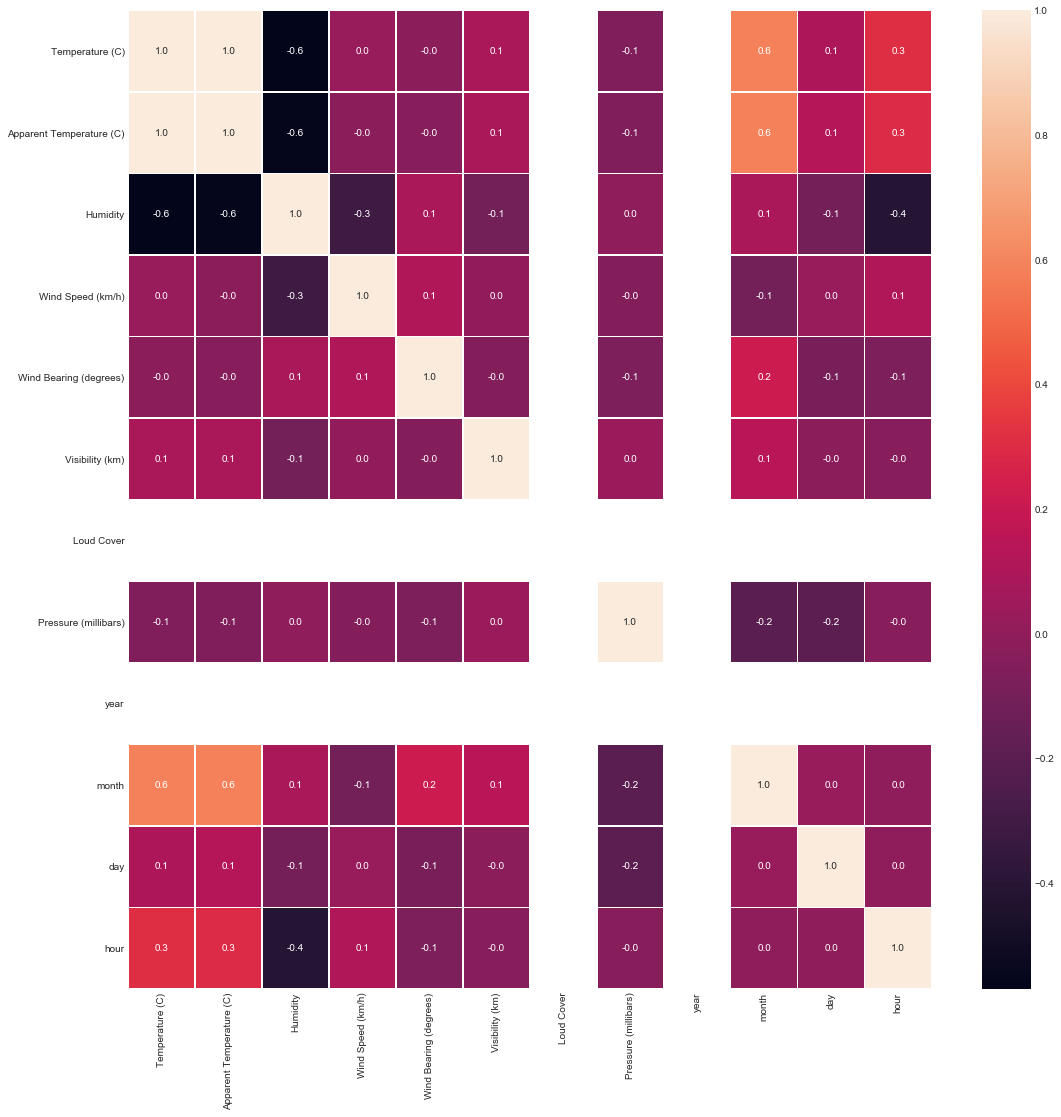

In [11]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

**Quantitative variables. Missing values**

In [12]:
data[quantitative].describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000,1464.0,1464.000000
mean,16.116374,15.874954,0.745587,10.244098,212.586066,11.088490,0.0,975.016865
std,5.870141,6.384119,0.172190,6.268961,92.230666,3.100225,0.0,190.915136
min,0.955556,-0.866667,0.320000,0.000000,0.000000,0.289800,0.0,0.000000
25%,12.222222,12.222222,0.620000,5.409600,149.000000,9.982000,0.0,1009.170000
50%,16.105556,16.105556,0.780000,9.515100,223.000000,11.125100,0.0,1012.380000
75%,19.956944,19.956944,0.900000,13.882225,291.000000,11.753000,0.0,1015.500000
max,32.638889,35.494444,1.000000,36.386000,359.000000,16.100000,0.0,1021.010000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018893825B88>,
      dtype=object)

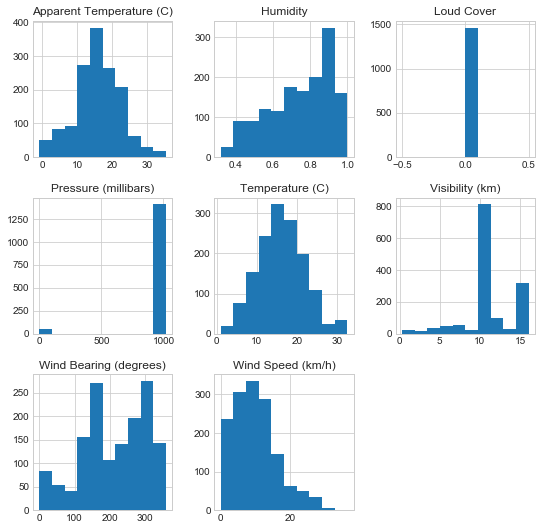

In [13]:
rcParams['figure.figsize'] = 9, 9
data[quantitative].hist()

'Loud Cover' takes values zero. We drop it

In [14]:
data=data.drop('Loud Cover',axis=1)

"Pressure (millibars)".

Some observations are nil. It seems that they lack values. because the pressure does not take zero as value 

Let's fill the zeros with the median:

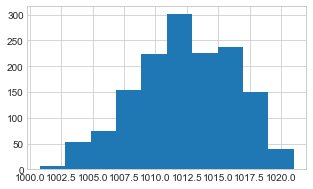

In [15]:
pressure_median = data['Pressure (millibars)'].median()
      
def pressure(x):
    if x==0:
        return x + pressure_median
    else:
        return x
        
data["Pressure (millibars)"] = data.apply(lambda row:pressure(row["Pressure (millibars)"]) , axis = 1)

rcParams['figure.figsize'] = 5, 3
data['Pressure (millibars)'].hist()


** Categorical variables**

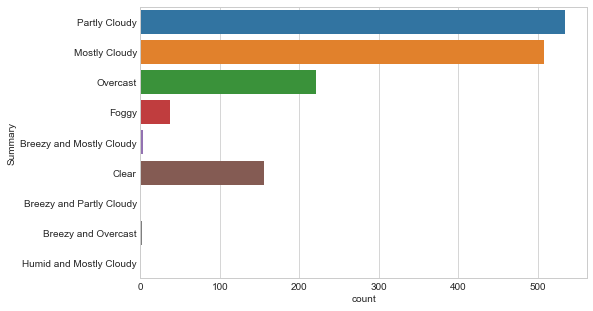

In [16]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=data['Summary'])

In [17]:
data['Daily Summary'].value_counts(dropna=False)

Mostly cloudy throughout the day.                                  264
Mostly cloudy until night.                                         144
Partly cloudy starting in the morning.                             144
Partly cloudy throughout the day.                                  120
Mostly cloudy until evening.                                        96
Partly cloudy until night.                                          96
Partly cloudy until evening.                                        96
Foggy in the morning.                                               72
Overcast throughout the day.                                        48
Mostly cloudy starting overnight continuing until night.            48
Partly cloudy starting in the afternoon.                            48
Foggy starting overnight continuing until morning.                  48
Partly cloudy until morning.                                        24
Foggy overnight and breezy in the morning.                          24
Mostly

In [18]:
data['Summary'].value_counts(dropna=False)

Partly Cloudy               535
Mostly Cloudy               508
Overcast                    221
Clear                       156
Foggy                        37
Breezy and Mostly Cloudy      3
Breezy and Overcast           2
Humid and Mostly Cloudy       1
Breezy and Partly Cloudy      1
Name: Summary, dtype: int64

In [19]:
data['Precip Type'].value_counts(dropna=False)

rain    1464
Name: Precip Type, dtype: int64

In [20]:
data.fillna(method='ffill', inplace=True)

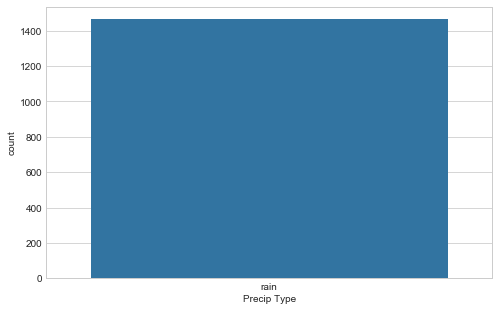

In [21]:
sns.countplot(x=data['Precip Type'])

In [22]:

# Calculate total number of cells in dataframe
totalCells = np.product(data.shape)

# Count number of missing values per column
missingCount = data.isnull().sum()

# Calculate total number of missing values
totalMissing = missingCount.sum()

# Calculate percentage of missing values
print("The weather history dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

The weather history dataset contains 0.0 % missing values.


<Figure size 1296x576 with 0 Axes>

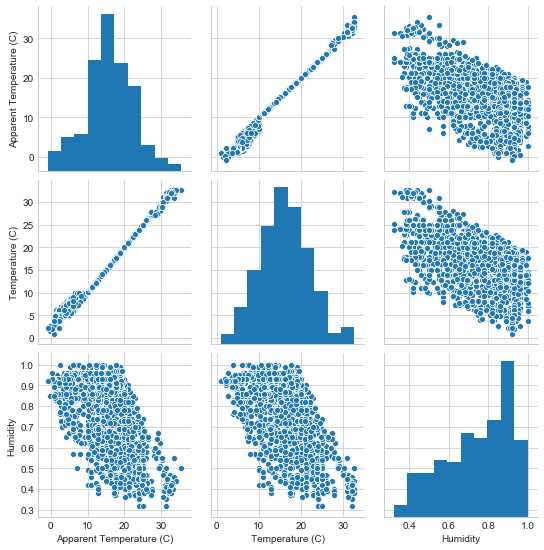

In [23]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
sns.pairplot(data[['Apparent Temperature (C)','Temperature (C)', 'Humidity' ]])
plt.show()

<Figure size 1296x576 with 0 Axes>

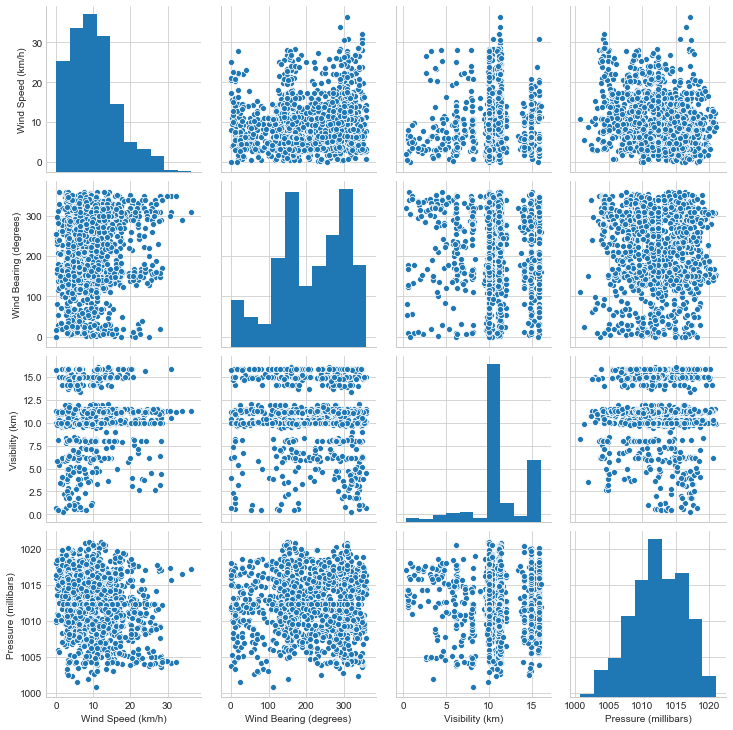

In [24]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
sns.pairplot(data[['Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']])
plt.show()

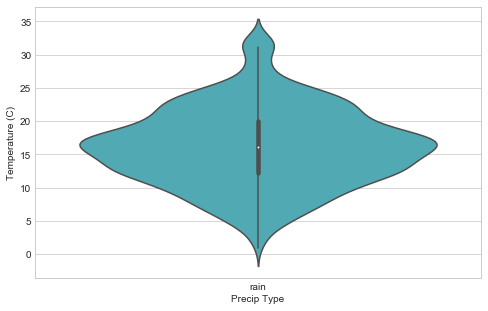

In [25]:
sns.violinplot(x="Precip Type", y="Temperature (C)", data=data, palette="YlGnBu");

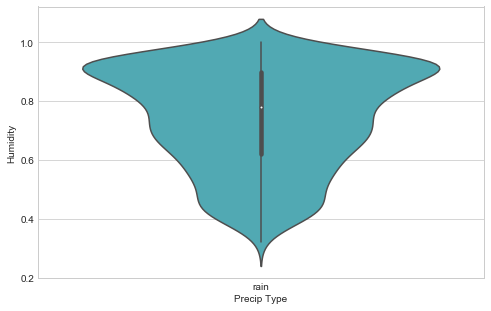

In [26]:
sns.violinplot(x="Precip Type", y="Humidity", data=data, palette="YlGnBu");

With these plots we can choose two variables to study the relationship betweem them.

In this study let's focus to explore Temperature as a function of Humidity : how humidity influences in temperature?.

***Linear Regression***

In [27]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

ls = linear_model.LinearRegression()



X = data["Humidity"].values.reshape(-1,1)
y = data["Temperature (C)"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    shuffle=True, random_state=0)
print("Linear Regression")
ls.fit(X_train, y_train)
print("alpha = ",ls.coef_[0])
print("beta = ",ls.intercept_)
print("\n\nCalculating some regression quality metrics")
y_pred = ls.predict(X_test)
print("MSE = ",mean_squared_error(y_test, y_pred))
print("R2 = ",r2_score(y_test, y_pred))

Linear Regression
alpha =  [-19.55210144]
beta =  [30.56265016]


Calculating some regression quality metrics
MSE =  22.51956589422308
R2 =  0.3164065406855072


**Decision Tree Classifier**

first of all i'm going to change the categorical variables to numeric

In [28]:
def change_category_to_number(DailySummaryCat):
    if DailySummaryCat=='Partly cloudy throughout the day.':
        return 1
    elif DailySummaryCat=='Mostly cloudy throughout the day.':
        return 2
    elif DailySummaryCat=='Foggy in the evening.':
        return 3
    elif DailySummaryCat=='Foggy overnight and breezy in the morning.':
        return 4
    elif DailySummaryCat=='Overcast throughout the day.':
        return 5
    elif DailySummaryCat=='Partly cloudy until night.':
        return 6
    elif DailySummaryCat=='Motly cloudy until night.':
        return 7
    elif DailySummaryCat=='Foggy starting overnight continuing until morning.':
        return 8
    elif DailySummaryCat=='Foggy in the morning.':
        return 9
    elif DailySummaryCat=='Partly cloudy until evening.':
        return 10
    elif DailySummaryCat=='Partly cloudy starting in the morning.':
        return 11
    elif DailySummaryCat=='Mostly cloudy starting overnight continuing until night.':
        return 12
    elif DailySummaryCat=='Partly cloudy starting in the afternoon.':
        return 13
    elif DailySummaryCat=='Partly cloudy starting overnight.':
        return 14
    elif DailySummaryCat=='Mostly cloudy starting overnight.':
        return 15
    elif DailySummaryCat=='Mostly cloudy until night and breezy in the afternoon.':
        return 16
    elif DailySummaryCat=='Mostly cloudy until evening.':
        return 17
    elif DailySummaryCat=='Foggy throughout the day.':
        return 18
    elif DailySummaryCat=='Partly cloudy starting in the morning.':
        return 19
    elif DailySummaryCat=='Partly cloudy starting in the morning continuing until evening.':
        return 20
    elif DailySummaryCat=='Foggy until morning.':
        return 21
    elif DailySummaryCat=='Partly cloudy starting in the morning continuing until night.':
        return 22
    elif DailySummaryCat=='Mostly cloudy starting in the morning.':
        return 23
    elif DailySummaryCat=='Foggy starting in the evening.':
        return 24
    elif DailySummaryCat=='Partly cloudy starting in the afternoon continuing until evening.':
        return 25
    elif DailySummaryCat=='Foggy overnight.':
        return 26
    elif DailySummaryCat=='Clear throughout the day.':
        return 27
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until night.':
        return 28
    elif DailySummaryCat=='Partly cloudy overnight.':
        return 29
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until evening.':
        return 30
    elif DailySummaryCat=='Foggy until night.':
        return 31
    elif DailySummaryCat=='Partly cloudy in the morning.':
        return 32
    elif DailySummaryCat=='Foggy starting overnight continuing until afternoon.':
        return 33
    elif DailySummaryCat=='Foggy until afternoon.':
        return 34
    elif DailySummaryCat=='Breezy and mostly cloudy overnight.':
        return 35
    elif DailySummaryCat=='Partly cloudy overnight and breezy starting in the morning continuing until afternoon.':
        return 36
    elif DailySummaryCat=='Breezy in the morning and foggy in the evening.':
        return 37
    elif DailySummaryCat=='Mostly cloudy until evening and breezy in the evening.':
        return 38
    elif DailySummaryCat=='Mostly cloudy starting in the evening.':
        return 39
    elif DailySummaryCat=='Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.':
        return 40
    elif DailySummaryCat=='Breezy starting in the morning continuing until night.':
        return 41
    elif DailySummaryCat=='Overcast throughout the day and breezy starting overnight continuing until morning.':
        return 42
    elif DailySummaryCat=='Breezy starting overnight continuing until morning and foggy in the evening.':
        return 43
    elif DailySummaryCat=='Light rain until morning.':
        return 44
    elif DailySummaryCat=='Mostly cloudy until night and breezy starting in the afternoon continuing until night.':
        return 45
    elif DailySummaryCat=='Mostly cloudy starting in the morning continuing until afternoon.':
        return 46
    elif DailySummaryCat=='Breezy until afternoon and overcast throughout the day.':
        return 47
    elif DailySummaryCat=='Partly cloudy until evening and breezy in the afternoon.':
        return 48
    elif DailySummaryCat=='Breezy starting overnight continuing until morning and partly cloudy starting overnight continuing until evening.':
        return 49
    elif DailySummaryCat=='Light rain starting overnight.':
        return 50
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until evening and breezy starting in the morning continuing until evening.':
        return 51
    elif DailySummaryCat=='Foggy starting in the morning continuing until evening and breezy in the evening.':
        return 52
    elif DailySummaryCat=='Partly cloudy throughout the day and breezy in the afternoon.':
        return 53
    elif DailySummaryCat=='Mostly cloudy starting overnight continuing until evening and breezy starting overnight continuing until morning.':
        return 54
    elif DailySummaryCat=='Partly cloudy starting overnight continuing until evening and breezy in the morning.':
        return 55
    elif DailySummaryCat=='Overcast throughout the day and breezy overnight.':
        return 56
    elif DailySummaryCat=='Light rain in the morning.':
        return 57
    elif DailySummaryCat=='Rain until morning.':
        return 58
    elif DailySummaryCat=='Breezy in the morning and mostly cloudy starting in the evening.':
        return 59
    elif DailySummaryCat=='Mostly cloudy starting in the morning and breezy overnight.':
        return 60
    elif DailySummaryCat=='Partly cloudy starting overnight and breezy starting in the morning continuing until afternoon.':
        return 61
    elif DailySummaryCat=='Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.':
        return 62
    elif DailySummaryCat=='Partly cloudy starting in the morning continuing until evening and breezy in the afternoon.':
        return 63
    elif DailySummaryCat=='Foggy starting overnight continuing until morning and breezy in the afternoon.':
        return 64

In [29]:
# assign a numerical value to the categorical field of class, by using the above function
data['DailySummaryCat'] = data['Daily Summary'].apply(change_category_to_number)

In [30]:
data.fillna(method='ffill', inplace=True) 

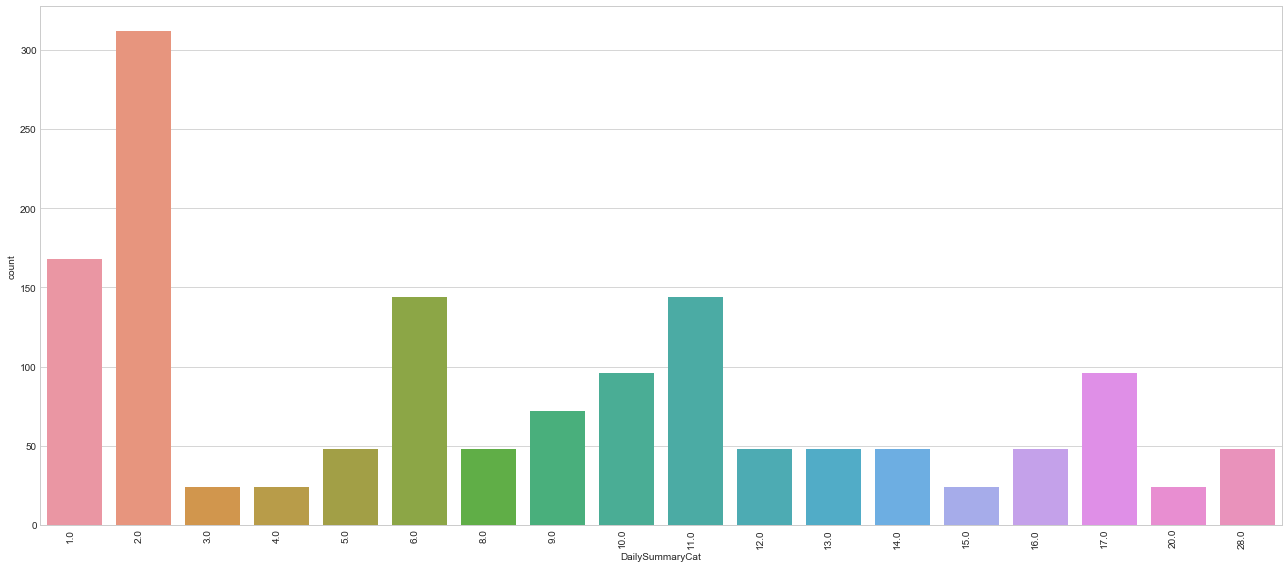

In [31]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(x=data['DailySummaryCat'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [32]:
def change_category(Summary):
    if Summary=='Partly Cloudy':
        return 1
    elif Summary=='Mostly Cloudy':
        return 2
    elif Summary=='Foggy':
        return 3
    elif Summary=='Clear':
        return 4
    elif Summary=='Overcast':
        return 5
    elif Summary=='Breezy and Overcast':
        return 6
    elif Summary=='Breezy and Partly Cloudy':
        return 7
    elif Summary=='Breezy and Mostly Cloudy':
        return 8
    elif Summary=='Dry and Partly Cloudy':
        return 9
    elif Summary=='Windy and Partly Cloudy':
        return 10
    elif Summary=='Light Rain':
        return 11
    elif Summary=='Breezy':
        return 12
    elif Summary=='Windy and Overcast':
        return 13
    elif Summary=='Humid and Mostly Cloudy':
        return 14
    elif Summary=='Drizzle':
        return 15
    elif Summary=='Windy and Mostly Cloudy':
        return 16
    elif Summary=='Breezy and Foggy':
        return 17
    elif Summary=='Dry':
        return 18
    elif Summary=='Humid and Partly Cloudy':
        return 19
    elif Summary=='Dry and Mostly Cloudy':
        return 20
    elif Summary=='Rain':
        return 21
    elif Summary=='Windy':
        return 22
    elif Summary=='Humid and Overcast':
        return 23
    elif Summary=='Windy and Foggy':
        return 24
    elif Summary=='Dangerously Windy and Partly Cloudy':
        return 25
    elif Summary=='Windy and Dry':
        return 26
    elif Summary=='Breezy and Dry':
        return 27
    

In [33]:
# assign a numerical value to the categorical field of class, by using the above function
data['SummaryCat'] = data['Summary'].apply(change_category)


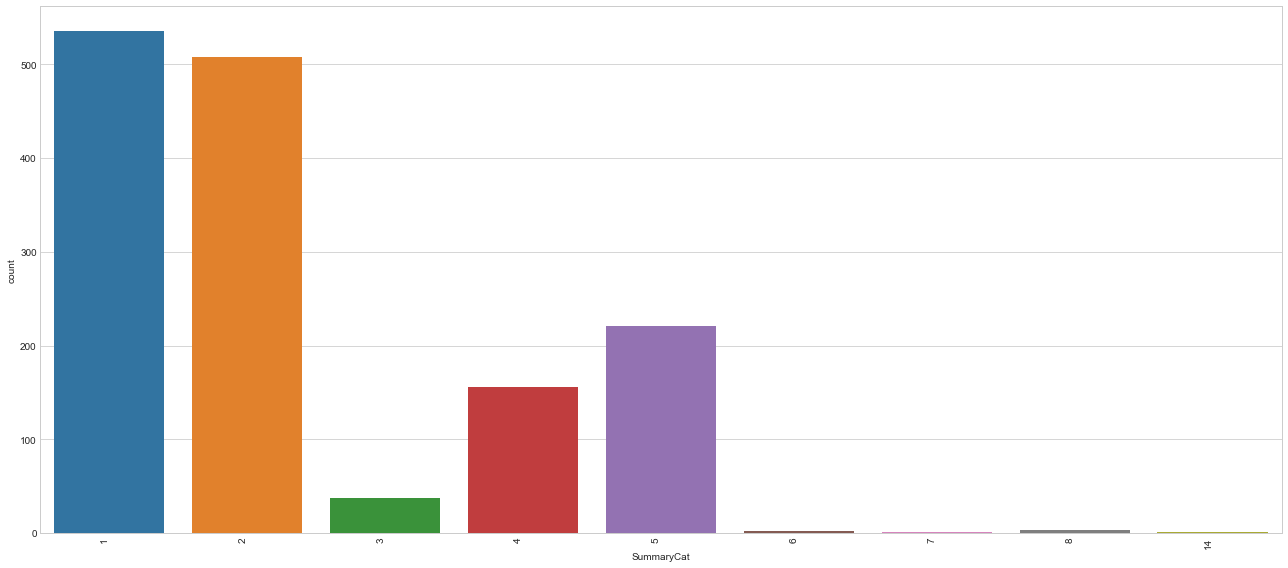

In [34]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(x=data['SummaryCat'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [35]:
def change_category(PrecipTypeCat):
    if PrecipTypeCat=='rain':
        return 1
    elif PrecipTypeCat=='snow':
        return 2
  

In [36]:
# assign a numerical value to the categorical field of class, by using the above function
data['PrecipTypeCat'] = data['Precip Type'].apply(change_category)

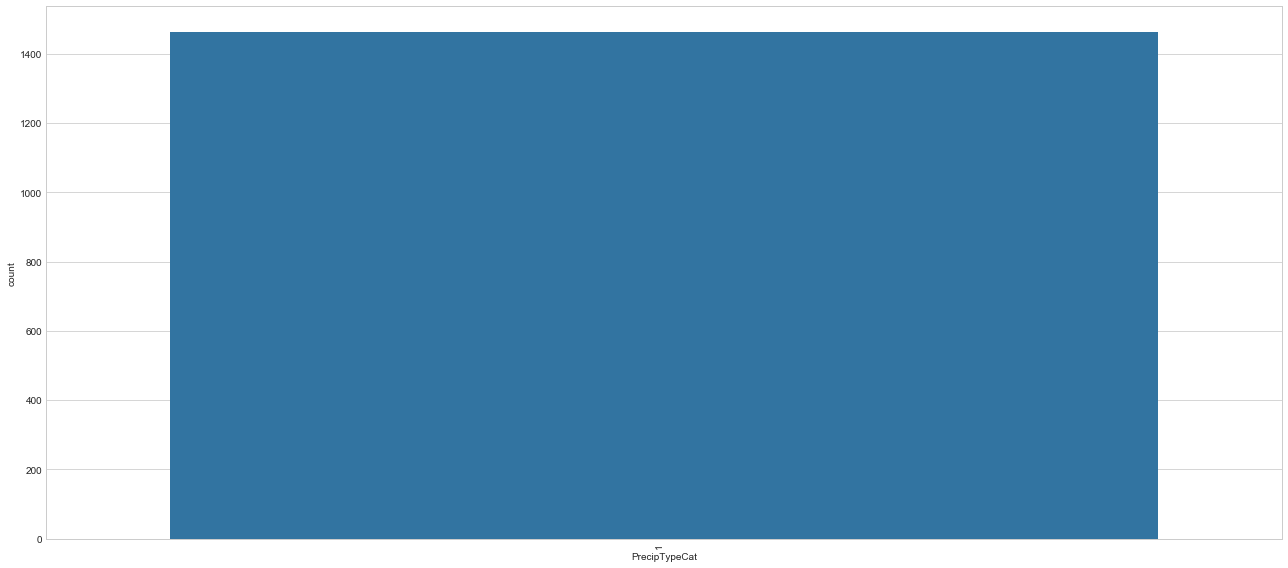

In [37]:
plt.figure(figsize=(18,8)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(x=data['PrecipTypeCat'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [38]:
data.drop(['Formatted Date','Summary','Daily Summary','Precip Type','Date'],axis=1,inplace=True)
data.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day,hour,DailySummaryCat,SummaryCat,PrecipTypeCat
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,4,1,0,1.0,1,1
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,4,1,1,1.0,1,1
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1,2,1.0,2,1
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1,3,1.0,1,1
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1,4,1.0,2,1


In [39]:
X = data.drop('DailySummaryCat', axis=1)
y = data['DailySummaryCat']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)

In [41]:
dtClassifer = DecisionTreeClassifier(max_leaf_nodes=15,random_state=0)

In [42]:
dtClassifer.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [43]:
prediction = dtClassifer.predict(X_test)

In [44]:
prediction[:100]

array([ 2., 13.,  2.,  2.,  6.,  6.,  2.,  1.,  2.,  2.,  2.,  6.,  2.,
        2., 17.,  2.,  2., 13.,  2.,  2.,  2.,  2., 17.,  2.,  2.,  2.,
       11.,  6.,  1., 17., 11.,  6.,  2.,  2., 17., 13.,  2.,  2., 17.,
        2.,  2., 13., 13., 17.,  2., 11.,  2., 12.,  2., 11.,  6.,  2.,
       17.,  2.,  2.,  6.,  1.,  3., 13., 17., 11.,  2., 11., 11.,  1.,
       12.,  2., 11., 28., 11.,  1., 13., 13.,  2., 17., 17.,  2.,  2.,
        2.,  1.,  6.,  1., 17.,  1.,  6.,  2.,  2., 17., 17., 17.,  2.,
       11., 13., 17., 17.,  2.,  1., 11.,  2.,  2.])

In [45]:
y_test[:100]

730     14.0
334      9.0
187      2.0
620      9.0
1179     6.0
        ... 
1409     2.0
802      1.0
1095    11.0
545      6.0
1406     2.0
Name: DailySummaryCat, Length: 100, dtype: float64

In [46]:
accuracy_score(y_true=y_test, y_pred=prediction)

0.5568181818181818

**Logistic Regression**

In [47]:
lrClassifier = LogisticRegression()

In [48]:
lrClassifier.fit(X_train,y_train)

C:\anaconda\data\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
prediction = lrClassifier.predict(X_test)

In [50]:
prediction[:3000]

array([ 1.,  2.,  2.,  2., 16.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2., 17.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2., 11., 16.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2., 17.,  2.,  2.,  2.,  2.,  2.,  2., 16.,  2.,
       16.,  2.,  2.,  2.,  2.,  2., 17.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2., 17.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2., 16.,  2.,  2.,  2., 11.,  1.,  2.,  2.,  2.,  1.,  2.,
        2., 17., 11.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2., 16.,  2.,
        2.,  2.,  2.,  2., 16.,  2.,  2.,  2.,  2.,  2., 11.,  2.,  2.,
        2.,  2.,  2., 11., 17.,  2., 16.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2., 17.,  2.,  2.,  2.,
        2.,  2.,  2., 11.,  2., 17., 16.,  1.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2

In [51]:
y_test[:100]

730     14.0
334      9.0
187      2.0
620      9.0
1179     6.0
        ... 
1409     2.0
802      1.0
1095    11.0
545      6.0
1406     2.0
Name: DailySummaryCat, Length: 100, dtype: float64

In [52]:
accuracy_score(y_true=y_test, y_pred=prediction)

0.20909090909090908

**Visualization. Weather calendar**

In [53]:
#Drawing a heatmap
def facet_heatmap(data, color, **kws):
    values=data.columns.values[3]
    data = data.pivot(index='day', columns='hour', values=values)
    sns.heatmap(data, cmap='coolwarm', **kws)  

#Joining heatmaps of every month in a year 
def weather_calendar(year,weather): #Year= Any year in DataFrame. Weather=Any quantitative variable
    datayear = data[data['year']==year][['month', 'day', 'hour', weather]]
    vmin=datayear[weather].min()
    vmax=datayear[weather].max()
    print(vmin, vmax)
    with sns.plotting_context(font_scale=12):
        g = sns.FacetGrid(datayear,col="month", col_wrap=3) #One heatmap per month
        g = g.map_dataframe(facet_heatmap,vmin=vmin, vmax=vmax)
        g.set_axis_labels('Hour', 'Day')
        plt.subplots_adjust(top=0.9)
        g.fig.suptitle('%s Calendar. Year: %s.' %(weather, year), fontsize=18)

0.9555555555555548 32.638888888888886


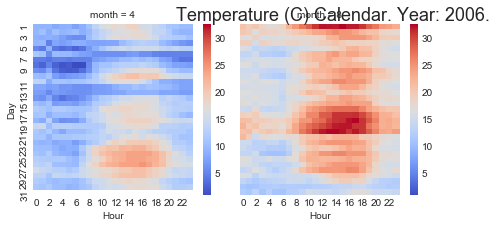

In [54]:
weather_calendar(2006,'Temperature (C)')

0.32 1.0


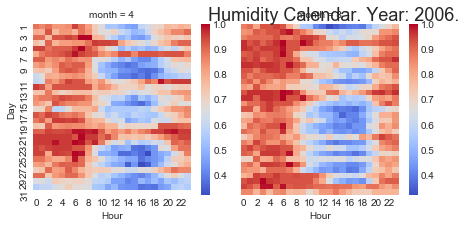

In [55]:
weather_calendar(2006,'Humidity')

**Neural Model for Weather Prediction**

In [56]:
data_neur=data


In [57]:
data_neur['T'] = data['Temperature (C)']
data_neur['TA'] = data['Apparent Temperature (C)']
data_neur['H'] = data['Humidity']
data_neur['WS'] = data['Wind Speed (km/h)']
data_neur['WB'] = data['Wind Bearing (degrees)']
data_neur['V'] = data['Visibility (km)']
data_neur['P'] = data['Pressure (millibars)']
data_neur['Y'] = data['year']
data_neur['M'] = data['month']
data_neur['D'] = data['day']
data_neur['HR'] = data['hour']
data_neur['SC'] = data['SummaryCat']
data_neur['PT'] = data['PrecipTypeCat']
data.drop(['hour','day','month','year','Pressure (millibars)','Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','SummaryCat','PrecipTypeCat'],axis=1,inplace=True)
data_neur.head()

,DailySummaryCat,T,TA,H,WS,WB,V,P,Y,M,D,HR,SC,PT
0,1.0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,4,1,0,1,1
1,1.0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,4,1,1,1,1
2,1.0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1,2,2,1
3,1.0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1,3,1,1
4,1.0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1,4,2,1


In [58]:
# X will be a pandas dataframe of all columns except meantempm
X = data_neur[[col for col in data_neur.columns if col != 'DailySummaryCat']]

# y will be a pandas series of the meantempm
y = data_neur['DailySummaryCat']

In [59]:
# split data into training set and a temporary set using sklearn.model_selection.traing_test_split
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)

In [60]:
# take the remaining 20% of data in X_tmp, y_tmp and split them evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   1171, Training features   13
Validation instances 147, Validation features 13
Testing instances    146, Testing features    13


In [61]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]

In [62]:
tf.VERSION #to check it has the latest version over 1.21 if not then install with conda update -f -c conda-forge tensorflow

'1.14.0'

In [63]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,
                                      hidden_units=[50, 50],
                                      model_dir='tf_wx_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tf_wx_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000188963C2588>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [64]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=260): # 260 is used as we have approx 570 dataset for training
    return tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [65]:
evaluations = []
STEPS = 260
for i in range(100):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluation = regressor.evaluate(input_fn=wx_input_fn(X_val, y_val,
                                                         num_epochs=1,
                                                         shuffle=False),
                                    steps=1)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `

INFO:tensorflow:loss = 13740939.0, step = 1
INFO:tensorflow:global_step/sec: 183.785
INFO:tensorflow:loss = 36046.836, step = 101 (0.546 sec)
INFO:tensorflow:global_step/sec: 239.947
INFO:tensorflow:loss = 24672.373, step = 201 (0.417 sec)
INFO:tensorflow:Saving checkpoints for 260 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 18669.97.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:32:44Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-260
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:32:44
INFO:tensorflow:Saving dict for global step 260: average_loss = 80.93137, global_step = 260, label/mean = 7.952381, loss = 11896.912, predic

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:32:45Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-260
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-04-17-12:32:45
INFO:tensorflow:Saving dict for global step 260: average_loss = 80.93137, global_step = 260, label/mean = 7.952381, loss = 11896.912, prediction/mean = 8.5254
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 260: tf_wx_model\model.ckpt-260
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-260
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 260 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 21891.627, step = 261
INFO:tensorflow:global_step/sec: 205.086
INFO:tensorflow:loss = 14098.368, step = 361 (0.491 sec)
INFO:tensorflow:global_step/sec: 232.168
INFO:tensorflow:loss = 13376.215, step = 461 (0.430 sec)
INFO:tensorflow:Saving checkpoints for 520 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10976.023.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:32:48Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\m

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:32:49Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-520
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-04-17-12:32:50
INFO:tensorflow:Saving dict for global step 520: average_loss = 50.13427, global_step = 520, label/mean = 7.952381, loss = 7369.738, prediction/mean = 8.044591
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 520: tf_wx_model\model.ckpt-520
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-520
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 520 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10562.398, step = 521
INFO:tensorflow:global_step/sec: 149.438
INFO:tensorflow:loss = 12640.214, step = 621 (0.671 sec)
INFO:tensorflow:global_step/sec: 143.914
INFO:tensorflow:loss = 10063.549, step = 721 (0.697 sec)
INFO:tensorflow:Saving checkpoints for 780 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 11468.553.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:32:54Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-780
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:D

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:32:56Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-780
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-04-17-12:32:57
INFO:tensorflow:Saving dict for global step 780: average_loss = 46.04514, global_step = 780, label/mean = 7.952381, loss = 6768.6353, prediction/mean = 8.626765
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 780: tf_wx_model\model.ckpt-780
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-780
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 780 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 11262.255, step = 781
INFO:tensorflow:global_step/sec: 174.237
INFO:tensorflow:loss = 11175.684, step = 881 (0.577 sec)
INFO:tensorflow:global_step/sec: 196.914
INFO:tensorflow:loss = 10960.962, step = 981 (0.506 sec)
INFO:tensorflow:Saving checkpoints for 1040 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9815.541.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:33:01Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-1040
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:33:02Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-1040
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-04-17-12:33:02
INFO:tensorflow:Saving dict for global step 1040: average_loss = 44.83133, global_step = 1040, label/mean = 7.952381, loss = 6590.2056, prediction/mean = 8.40715
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1040: tf_wx_model\model.ckpt-1040
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-1040
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1040 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 11214.695, step = 1041
INFO:tensorflow:global_step/sec: 162.725
INFO:tensorflow:loss = 12389.635, step = 1141 (0.619 sec)
INFO:tensorflow:global_step/sec: 225.792
INFO:tensorflow:loss = 12473.275, step = 1241 (0.443 sec)
INFO:tensorflow:Saving checkpoints for 1300 into tf_wx_model\model.ckpt.
Instructions for updating:
Use standard file APIs to delete files with this prefix.
INFO:tensorflow:Loss for final step: 11627.377.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:33:06Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameter

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:33:08Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-1300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-04-17-12:33:08
INFO:tensorflow:Saving dict for global step 1300: average_loss = 44.925476, global_step = 1300, label/mean = 7.952381, loss = 6604.045, prediction/mean = 8.83639
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1300: tf_wx_model\model.ckpt-1300
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-1300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1300 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9806.276, step = 1301
INFO:tensorflow:global_step/sec: 177.743
INFO:tensorflow:loss = 10845.455, step = 1401 (0.567 sec)
INFO:tensorflow:global_step/sec: 179.945
INFO:tensorflow:loss = 11384.736, step = 1501 (0.555 sec)
INFO:tensorflow:Saving checkpoints for 1560 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10206.403.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:33:12Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-1560
INFO:tensorflow:Running local_init_op.
INFO:tensor

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:33:13Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-1560
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-04-17-12:33:14
INFO:tensorflow:Saving dict for global step 1560: average_loss = 43.89177, global_step = 1560, label/mean = 7.952381, loss = 6452.0903, prediction/mean = 8.300204
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1560: tf_wx_model\model.ckpt-1560
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-1560
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1560 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10153.563, step = 1561
INFO:tensorflow:global_step/sec: 120.151
INFO:tensorflow:loss = 11574.899, step = 1661 (0.836 sec)
INFO:tensorflow:global_step/sec: 138.789
INFO:tensorflow:loss = 11463.667, step = 1761 (0.721 sec)
INFO:tensorflow:Saving checkpoints for 1820 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9920.228.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:33:19Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-1820
INFO:tensorflow:Running local_init_op.
INFO:tensor

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:33:20Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-1820
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-04-17-12:33:20
INFO:tensorflow:Saving dict for global step 1820: average_loss = 43.614063, global_step = 1820, label/mean = 7.952381, loss = 6411.2676, prediction/mean = 8.379514
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1820: tf_wx_model\model.ckpt-1820
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-1820
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1820 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 11168.953, step = 1821
INFO:tensorflow:global_step/sec: 176.499
INFO:tensorflow:loss = 11349.367, step = 1921 (0.572 sec)
INFO:tensorflow:global_step/sec: 146.197
INFO:tensorflow:loss = 11059.623, step = 2021 (0.681 sec)
INFO:tensorflow:Saving checkpoints for 2080 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 13018.213.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:33:25Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-2080
INFO:tensorflow:Running local_init_op.
INFO:tenso

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:33:27Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-2080
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-04-17-12:33:28
INFO:tensorflow:Saving dict for global step 2080: average_loss = 43.475945, global_step = 2080, label/mean = 7.952381, loss = 6390.964, prediction/mean = 8.533772
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2080: tf_wx_model\model.ckpt-2080
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-2080
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2080 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10474.41, step = 2081
INFO:tensorflow:global_step/sec: 161.93
INFO:tensorflow:loss = 11269.321, step = 2181 (0.621 sec)
INFO:tensorflow:global_step/sec: 212.7
INFO:tensorflow:loss = 11118.734, step = 2281 (0.471 sec)
INFO:tensorflow:Saving checkpoints for 2340 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10960.324.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:33:33Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-2340
INFO:tensorflow:Running local_init_op.
INFO:tensorflo

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:33:34Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-2340
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-04-17-12:33:34
INFO:tensorflow:Saving dict for global step 2340: average_loss = 43.051178, global_step = 2340, label/mean = 7.952381, loss = 6328.523, prediction/mean = 8.365068
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2340: tf_wx_model\model.ckpt-2340
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-2340
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2340 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10532.967, step = 2341
INFO:tensorflow:global_step/sec: 175.146
INFO:tensorflow:loss = 10271.112, step = 2441 (0.574 sec)
INFO:tensorflow:global_step/sec: 206.472
INFO:tensorflow:loss = 10653.774, step = 2541 (0.484 sec)
INFO:tensorflow:Saving checkpoints for 2600 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10106.355.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:33:38Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-2600


INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:33:39
INFO:tensorflow:Saving dict for global step 2600: average_loss = 42.85178, global_step = 2600, label/mean = 7.952381, loss = 6299.212, prediction/mean = 8.401358
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2600: tf_wx_model\model.ckpt-2600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:33:39Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-2600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-04-17-12:33:40
INFO:tensorflow:Saving dict for global step 2600: average_loss = 42.85178, global_step = 2600, label/mean = 7.952381, loss = 6299.212, prediction/mean = 8.401358
INFO:tensorflow:Savi

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-2600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10430.127, step = 2601
INFO:tensorflow:global_step/sec: 161.846
INFO:tensorflow:loss = 11768.323, step = 2701 (0.620 sec)
INFO:tensorflow:global_step/sec: 205.718
INFO:tensorflow:loss = 9671.39, step = 2801 (0.485 sec)
INFO:tensorflow:Saving checkpoints for 2860 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10550.884.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:33:44Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-2860
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:33:44
INFO:tensorflow:Saving dict for global step 2860: average_loss = 42.788998, global_step = 2860, label/mean = 7.952381, loss = 6289.983, prediction/mean = 8.541314
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2860: tf_wx_model\model.ckpt-2860
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:33:45Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-2860
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluatio

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-2860
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2860 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 12122.625, step = 2861
INFO:tensorflow:global_step/sec: 158.342
INFO:tensorflow:loss = 9693.229, step = 2961 (0.637 sec)
INFO:tensorflow:global_step/sec: 211.646
INFO:tensorflow:loss = 9184.292, step = 3061 (0.470 sec)
INFO:tensorflow:Saving checkpoints for 3120 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10981.075.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:33:49Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-3120
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:33:50
INFO:tensorflow:Saving dict for global step 3120: average_loss = 42.492332, global_step = 3120, label/mean = 7.952381, loss = 6246.373, prediction/mean = 8.435614
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3120: tf_wx_model\model.ckpt-3120
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:33:51Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-3120
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluatio

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-3120
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3120 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10538.488, step = 3121
INFO:tensorflow:global_step/sec: 168.083
INFO:tensorflow:loss = 9472.882, step = 3221 (0.596 sec)
INFO:tensorflow:global_step/sec: 193.772
INFO:tensorflow:loss = 11224.311, step = 3321 (0.518 sec)
INFO:tensorflow:Saving checkpoints for 3380 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9489.309.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:33:55Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-3380
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:33:56
INFO:tensorflow:Saving dict for global step 3380: average_loss = 42.138287, global_step = 3380, label/mean = 7.952381, loss = 6194.328, prediction/mean = 8.1430435
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3380: tf_wx_model\model.ckpt-3380
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:33:56Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-3380
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluati

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-3380
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3380 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 11796.069, step = 3381
INFO:tensorflow:global_step/sec: 176.652
INFO:tensorflow:loss = 9158.66, step = 3481 (0.569 sec)
INFO:tensorflow:global_step/sec: 200.328
INFO:tensorflow:loss = 9965.727, step = 3581 (0.497 sec)
INFO:tensorflow:Saving checkpoints for 3640 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9038.241.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:34:01Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-3640
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:34:01
INFO:tensorflow:Saving dict for global step 3640: average_loss = 42.06402, global_step = 3640, label/mean = 7.952381, loss = 6183.4106, prediction/mean = 8.269941
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3640: tf_wx_model\model.ckpt-3640
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:34:02Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-3640
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluatio

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-3640
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3640 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 11160.29, step = 3641
INFO:tensorflow:global_step/sec: 177.575
INFO:tensorflow:loss = 9664.584, step = 3741 (0.564 sec)
INFO:tensorflow:global_step/sec: 195.494
INFO:tensorflow:loss = 9705.123, step = 3841 (0.513 sec)
INFO:tensorflow:Saving checkpoints for 3900 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10832.204.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:34:07Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-3900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:34:07
INFO:tensorflow:Saving dict for global step 3900: average_loss = 42.327084, global_step = 3900, label/mean = 7.952381, loss = 6222.0815, prediction/mean = 8.654763
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 3900: tf_wx_model\model.ckpt-3900
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:34:08Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-3900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluati

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-3900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 3900 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9419.648, step = 3901
INFO:tensorflow:global_step/sec: 146.963
INFO:tensorflow:loss = 11561.636, step = 4001 (0.682 sec)
INFO:tensorflow:global_step/sec: 198.994
INFO:tensorflow:loss = 11805.398, step = 4101 (0.504 sec)
INFO:tensorflow:Saving checkpoints for 4160 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 11319.072.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:34:12Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-4160
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:34:13
INFO:tensorflow:Saving dict for global step 4160: average_loss = 41.907463, global_step = 4160, label/mean = 7.952381, loss = 6160.397, prediction/mean = 8.382238
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4160: tf_wx_model\model.ckpt-4160
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:34:13Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-4160
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluatio

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-4160
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 4160 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10691.602, step = 4161
INFO:tensorflow:global_step/sec: 176.003
INFO:tensorflow:loss = 11693.637, step = 4261 (0.572 sec)
INFO:tensorflow:global_step/sec: 210.977
INFO:tensorflow:loss = 11270.632, step = 4361 (0.472 sec)
INFO:tensorflow:Saving checkpoints for 4420 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10020.102.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:34:18Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-4420
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:34:18
INFO:tensorflow:Saving dict for global step 4420: average_loss = 41.955524, global_step = 4420, label/mean = 7.952381, loss = 6167.462, prediction/mean = 8.534915
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4420: tf_wx_model\model.ckpt-4420
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:34:19Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-4420
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluatio

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-4420
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 4420 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 12146.892, step = 4421
INFO:tensorflow:global_step/sec: 151.986
INFO:tensorflow:loss = 9847.024, step = 4521 (0.662 sec)
INFO:tensorflow:global_step/sec: 209.654
INFO:tensorflow:loss = 9224.368, step = 4621 (0.476 sec)
INFO:tensorflow:Saving checkpoints for 4680 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 12665.689.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:34:23Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-4680
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:34:24
INFO:tensorflow:Saving dict for global step 4680: average_loss = 42.38479, global_step = 4680, label/mean = 7.952381, loss = 6230.564, prediction/mean = 8.882431
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4680: tf_wx_model\model.ckpt-4680
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:34:25Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-4680
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-4680
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 4680 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10079.352, step = 4681
INFO:tensorflow:global_step/sec: 158.357
INFO:tensorflow:loss = 9129.382, step = 4781 (0.633 sec)
INFO:tensorflow:global_step/sec: 211.4
INFO:tensorflow:loss = 10955.479, step = 4881 (0.475 sec)
INFO:tensorflow:Saving checkpoints for 4940 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10154.119.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:34:29Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-4940
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:34:29
INFO:tensorflow:Saving dict for global step 4940: average_loss = 41.72112, global_step = 4940, label/mean = 7.952381, loss = 6133.0044, prediction/mean = 8.481396
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 4940: tf_wx_model\model.ckpt-4940
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:34:30Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-4940
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluatio

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-4940
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 4940 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 12601.711, step = 4941
INFO:tensorflow:global_step/sec: 172.253
INFO:tensorflow:loss = 9601.57, step = 5041 (0.584 sec)
INFO:tensorflow:global_step/sec: 203.984
INFO:tensorflow:loss = 10315.867, step = 5141 (0.490 sec)
INFO:tensorflow:Saving checkpoints for 5200 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10844.852.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:34:35Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-5200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:34:35
INFO:tensorflow:Saving dict for global step 5200: average_loss = 41.492046, global_step = 5200, label/mean = 7.952381, loss = 6099.3306, prediction/mean = 8.297166
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5200: tf_wx_model\model.ckpt-5200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:34:36Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-5200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluati

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-5200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 5200 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9986.921, step = 5201
INFO:tensorflow:global_step/sec: 161.197
INFO:tensorflow:loss = 11173.977, step = 5301 (0.624 sec)
INFO:tensorflow:global_step/sec: 197.33
INFO:tensorflow:loss = 10369.009, step = 5401 (0.504 sec)
INFO:tensorflow:Saving checkpoints for 5460 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10097.997.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:34:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-5460
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:34:41
INFO:tensorflow:Saving dict for global step 5460: average_loss = 41.48566, global_step = 5460, label/mean = 7.952381, loss = 6098.392, prediction/mean = 8.375206
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5460: tf_wx_model\model.ckpt-5460
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:34:42Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-5460
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-5460
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 5460 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10365.385, step = 5461
INFO:tensorflow:global_step/sec: 158.254
INFO:tensorflow:loss = 10657.321, step = 5561 (0.633 sec)
INFO:tensorflow:global_step/sec: 194.285
INFO:tensorflow:loss = 9449.041, step = 5661 (0.517 sec)
INFO:tensorflow:Saving checkpoints for 5720 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10584.679.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:34:46Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-5720
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:34:47
INFO:tensorflow:Saving dict for global step 5720: average_loss = 41.46656, global_step = 5720, label/mean = 7.952381, loss = 6095.5845, prediction/mean = 8.426648
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5720: tf_wx_model\model.ckpt-5720
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:34:47Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-5720
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluatio

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-5720
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 5720 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9682.723, step = 5721
INFO:tensorflow:global_step/sec: 187.445
INFO:tensorflow:loss = 9857.701, step = 5821 (0.536 sec)
INFO:tensorflow:global_step/sec: 193.196
INFO:tensorflow:loss = 10930.524, step = 5921 (0.519 sec)
INFO:tensorflow:Saving checkpoints for 5980 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 8381.915.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:34:52Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-5980
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:34:52
INFO:tensorflow:Saving dict for global step 5980: average_loss = 41.20535, global_step = 5980, label/mean = 7.952381, loss = 6057.1865, prediction/mean = 8.101264
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5980: tf_wx_model\model.ckpt-5980
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:34:53Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-5980
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluatio

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-5980
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 5980 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 11632.1045, step = 5981
INFO:tensorflow:global_step/sec: 158.77
INFO:tensorflow:loss = 9433.642, step = 6081 (0.635 sec)
INFO:tensorflow:global_step/sec: 150.351
INFO:tensorflow:loss = 10879.11, step = 6181 (0.664 sec)
INFO:tensorflow:Saving checkpoints for 6240 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10956.04.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:34:58Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-6240
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:34:58
INFO:tensorflow:Saving dict for global step 6240: average_loss = 41.48153, global_step = 6240, label/mean = 7.952381, loss = 6097.7847, prediction/mean = 8.546871
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6240: tf_wx_model\model.ckpt-6240
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:34:59Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-6240
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluatio

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-6240
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 6240 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10494.712, step = 6241
INFO:tensorflow:global_step/sec: 171.87
INFO:tensorflow:loss = 11111.228, step = 6341 (0.583 sec)
INFO:tensorflow:global_step/sec: 188.705
INFO:tensorflow:loss = 12613.994, step = 6441 (0.530 sec)
INFO:tensorflow:Saving checkpoints for 6500 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 8997.087.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:35:04Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-6500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:35:04
INFO:tensorflow:Saving dict for global step 6500: average_loss = 41.114418, global_step = 6500, label/mean = 7.952381, loss = 6043.8193, prediction/mean = 8.1213665
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6500: tf_wx_model\model.ckpt-6500
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:35:05Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-6500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluat

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-6500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 6500 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9431.484, step = 6501
INFO:tensorflow:global_step/sec: 177.297
INFO:tensorflow:loss = 8991.8955, step = 6601 (0.567 sec)
INFO:tensorflow:global_step/sec: 193.971
INFO:tensorflow:loss = 10695.511, step = 6701 (0.517 sec)
INFO:tensorflow:Saving checkpoints for 6760 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10397.646.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:35:09Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-6760
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:35:10
INFO:tensorflow:Saving dict for global step 6760: average_loss = 41.50482, global_step = 6760, label/mean = 7.952381, loss = 6101.209, prediction/mean = 8.633593
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6760: tf_wx_model\model.ckpt-6760
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:35:10Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-6760
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-6760
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 6760 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9035.609, step = 6761
INFO:tensorflow:global_step/sec: 183.085
INFO:tensorflow:loss = 10126.701, step = 6861 (0.550 sec)
INFO:tensorflow:global_step/sec: 212.97
INFO:tensorflow:loss = 10499.201, step = 6961 (0.469 sec)
INFO:tensorflow:Saving checkpoints for 7020 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10784.958.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:35:15Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-7020
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:35:15
INFO:tensorflow:Saving dict for global step 7020: average_loss = 41.933426, global_step = 7020, label/mean = 7.952381, loss = 6164.214, prediction/mean = 8.918281
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 7020: tf_wx_model\model.ckpt-7020
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:35:16Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-7020
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluatio

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-7020
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 7020 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 11236.044, step = 7021
INFO:tensorflow:global_step/sec: 175.807
INFO:tensorflow:loss = 10675.07, step = 7121 (0.573 sec)
INFO:tensorflow:global_step/sec: 189.565
INFO:tensorflow:loss = 10650.966, step = 7221 (0.528 sec)
INFO:tensorflow:Saving checkpoints for 7280 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 11415.227.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:35:20Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-7280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:35:21
INFO:tensorflow:Saving dict for global step 7280: average_loss = 41.514652, global_step = 7280, label/mean = 7.952381, loss = 6102.654, prediction/mean = 8.691769
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 7280: tf_wx_model\model.ckpt-7280
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:35:22Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-7280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluatio

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-7280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 7280 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 11219.941, step = 7281
INFO:tensorflow:global_step/sec: 171.587
INFO:tensorflow:loss = 10262.681, step = 7381 (0.587 sec)
INFO:tensorflow:global_step/sec: 201.802
INFO:tensorflow:loss = 11164.582, step = 7481 (0.495 sec)
INFO:tensorflow:Saving checkpoints for 7540 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10811.114.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:35:26Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-7540
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:35:26
INFO:tensorflow:Saving dict for global step 7540: average_loss = 41.32014, global_step = 7540, label/mean = 7.952381, loss = 6074.0605, prediction/mean = 8.572045
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 7540: tf_wx_model\model.ckpt-7540
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:35:27Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-7540
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluatio

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-7540
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 7540 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9741.181, step = 7541
INFO:tensorflow:global_step/sec: 165.812
INFO:tensorflow:loss = 10471.957, step = 7641 (0.606 sec)
INFO:tensorflow:global_step/sec: 204.656
INFO:tensorflow:loss = 11660.995, step = 7741 (0.489 sec)
INFO:tensorflow:Saving checkpoints for 7800 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9399.022.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:35:32Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-7800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:35:32
INFO:tensorflow:Saving dict for global step 7800: average_loss = 41.421562, global_step = 7800, label/mean = 7.952381, loss = 6088.9697, prediction/mean = 8.670097
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 7800: tf_wx_model\model.ckpt-7800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:35:33Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-7800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluati

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-7800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 7800 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9750.223, step = 7801
INFO:tensorflow:global_step/sec: 161.992
INFO:tensorflow:loss = 10057.879, step = 7901 (0.619 sec)
INFO:tensorflow:global_step/sec: 205.159
INFO:tensorflow:loss = 11334.584, step = 8001 (0.490 sec)
INFO:tensorflow:Saving checkpoints for 8060 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9459.278.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:35:37Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-8060
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:35:38
INFO:tensorflow:Saving dict for global step 8060: average_loss = 40.98599, global_step = 8060, label/mean = 7.952381, loss = 6024.9404, prediction/mean = 8.276425
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 8060: tf_wx_model\model.ckpt-8060
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:35:38Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-8060
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluatio

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-8060
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 8060 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 12433.619, step = 8061
INFO:tensorflow:global_step/sec: 172.431
INFO:tensorflow:loss = 10528.9, step = 8161 (0.582 sec)
INFO:tensorflow:global_step/sec: 194.413
INFO:tensorflow:loss = 9226.975, step = 8261 (0.514 sec)
INFO:tensorflow:Saving checkpoints for 8320 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9983.754.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:35:43Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-8320
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:35:43
INFO:tensorflow:Saving dict for global step 8320: average_loss = 40.975407, global_step = 8320, label/mean = 7.952381, loss = 6023.385, prediction/mean = 8.297839
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 8320: tf_wx_model\model.ckpt-8320
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:35:44Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-8320
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluatio

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-8320
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 8320 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9184.857, step = 8321
INFO:tensorflow:global_step/sec: 167.307
INFO:tensorflow:loss = 8549.32, step = 8421 (0.602 sec)
INFO:tensorflow:global_step/sec: 184.651
INFO:tensorflow:loss = 9787.959, step = 8521 (0.543 sec)
INFO:tensorflow:Saving checkpoints for 8580 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10822.24.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:35:49Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-8580
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:35:49
INFO:tensorflow:Saving dict for global step 8580: average_loss = 41.369183, global_step = 8580, label/mean = 7.952381, loss = 6081.27, prediction/mean = 8.686218
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 8580: tf_wx_model\model.ckpt-8580
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:35:50Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-8580
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-8580
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 8580 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10482.047, step = 8581
INFO:tensorflow:global_step/sec: 150.862
INFO:tensorflow:loss = 9311.794, step = 8681 (0.668 sec)
INFO:tensorflow:global_step/sec: 197.392
INFO:tensorflow:loss = 10104.827, step = 8781 (0.505 sec)
INFO:tensorflow:Saving checkpoints for 8840 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9306.91.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:35:54Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-8840
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:35:55
INFO:tensorflow:Saving dict for global step 8840: average_loss = 41.06525, global_step = 8840, label/mean = 7.952381, loss = 6036.592, prediction/mean = 8.456057
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 8840: tf_wx_model\model.ckpt-8840
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:35:55Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-8840
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-8840
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 8840 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9470.8, step = 8841
INFO:tensorflow:global_step/sec: 175.721
INFO:tensorflow:loss = 11654.713, step = 8941 (0.571 sec)
INFO:tensorflow:global_step/sec: 187.949
INFO:tensorflow:loss = 10028.306, step = 9041 (0.534 sec)
INFO:tensorflow:Saving checkpoints for 9100 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 11651.465.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:36:00Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-9100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:36:01
INFO:tensorflow:Saving dict for global step 9100: average_loss = 41.459106, global_step = 9100, label/mean = 7.952381, loss = 6094.489, prediction/mean = 8.770067
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 9100: tf_wx_model\model.ckpt-9100
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:36:01Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-9100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluatio

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-9100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 9100 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9828.405, step = 9101
INFO:tensorflow:global_step/sec: 168.934
INFO:tensorflow:loss = 12338.026, step = 9201 (0.594 sec)
INFO:tensorflow:global_step/sec: 208.964
INFO:tensorflow:loss = 10323.879, step = 9301 (0.480 sec)
INFO:tensorflow:Saving checkpoints for 9360 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 11694.195.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:36:06Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-9360
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:36:06
INFO:tensorflow:Saving dict for global step 9360: average_loss = 41.11765, global_step = 9360, label/mean = 7.952381, loss = 6044.2944, prediction/mean = 8.538913
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 9360: tf_wx_model\model.ckpt-9360
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:36:07Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-9360
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluatio

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-9360
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 9360 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 8640.832, step = 9361
INFO:tensorflow:global_step/sec: 180.153
INFO:tensorflow:loss = 10128.484, step = 9461 (0.556 sec)
INFO:tensorflow:global_step/sec: 193.075
INFO:tensorflow:loss = 9434.869, step = 9561 (0.520 sec)
INFO:tensorflow:Saving checkpoints for 9620 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9822.054.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:36:11Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-9620
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:36:12
INFO:tensorflow:Saving dict for global step 9620: average_loss = 40.99929, global_step = 9620, label/mean = 7.952381, loss = 6026.8955, prediction/mean = 8.44617
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 9620: tf_wx_model\model.ckpt-9620
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:36:12Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-9620
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-9620
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 9620 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 11614.619, step = 9621
INFO:tensorflow:global_step/sec: 158.617
INFO:tensorflow:loss = 10078.111, step = 9721 (0.636 sec)
INFO:tensorflow:global_step/sec: 185.931
INFO:tensorflow:loss = 10649.431, step = 9821 (0.535 sec)
INFO:tensorflow:Saving checkpoints for 9880 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10533.491.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:36:17Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-9880
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:36:17
INFO:tensorflow:Saving dict for global step 9880: average_loss = 40.983463, global_step = 9880, label/mean = 7.952381, loss = 6024.569, prediction/mean = 8.446156
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 9880: tf_wx_model\model.ckpt-9880
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:36:18Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-9880
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluatio

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-9880
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 9880 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10593.286, step = 9881
INFO:tensorflow:global_step/sec: 163.653
INFO:tensorflow:loss = 9323.003, step = 9981 (0.615 sec)
INFO:tensorflow:global_step/sec: 203.646
INFO:tensorflow:loss = 10243.76, step = 10081 (0.491 sec)
INFO:tensorflow:Saving checkpoints for 10140 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9955.499.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:36:23Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-10140
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:36:23
INFO:tensorflow:Saving dict for global step 10140: average_loss = 41.364334, global_step = 10140, label/mean = 7.952381, loss = 6080.557, prediction/mean = 8.754231
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10140: tf_wx_model\model.ckpt-10140
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:36:24Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-10140
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-10140
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 10140 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9635.809, step = 10141
INFO:tensorflow:global_step/sec: 170.659
INFO:tensorflow:loss = 9185.137, step = 10241 (0.589 sec)
INFO:tensorflow:global_step/sec: 198.425
INFO:tensorflow:loss = 9248.609, step = 10341 (0.504 sec)
INFO:tensorflow:Saving checkpoints for 10400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 11270.441.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:36:28Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-10400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:36:29
INFO:tensorflow:Saving dict for global step 10400: average_loss = 41.24887, global_step = 10400, label/mean = 7.952381, loss = 6063.584, prediction/mean = 8.688066
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10400: tf_wx_model\model.ckpt-10400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:36:30Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-10400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eval

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-10400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 10400 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 11186.624, step = 10401
INFO:tensorflow:global_step/sec: 170.636
INFO:tensorflow:loss = 9348.603, step = 10501 (0.589 sec)
INFO:tensorflow:global_step/sec: 144.954
INFO:tensorflow:loss = 11183.597, step = 10601 (0.688 sec)
INFO:tensorflow:Saving checkpoints for 10660 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9430.127.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:36:34Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-10660
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:36:35
INFO:tensorflow:Saving dict for global step 10660: average_loss = 40.99279, global_step = 10660, label/mean = 7.952381, loss = 6025.9404, prediction/mean = 8.4977455
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10660: tf_wx_model\model.ckpt-10660
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:36:36Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-10660
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished ev

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-10660
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 10660 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10294.492, step = 10661
INFO:tensorflow:global_step/sec: 173.305
INFO:tensorflow:loss = 10015.346, step = 10761 (0.580 sec)
INFO:tensorflow:global_step/sec: 202.439
INFO:tensorflow:loss = 10191.002, step = 10861 (0.494 sec)
INFO:tensorflow:Saving checkpoints for 10920 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9609.38.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:36:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-10920
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:36:41
INFO:tensorflow:Saving dict for global step 10920: average_loss = 40.787148, global_step = 10920, label/mean = 7.952381, loss = 5995.711, prediction/mean = 8.2722225
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10920: tf_wx_model\model.ckpt-10920
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:36:41Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-10920
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished ev

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-10920
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 10920 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10024.519, step = 10921
INFO:tensorflow:global_step/sec: 158.6
INFO:tensorflow:loss = 10409.97, step = 11021 (0.642 sec)
INFO:tensorflow:global_step/sec: 191.367
INFO:tensorflow:loss = 9941.388, step = 11121 (0.514 sec)
INFO:tensorflow:Saving checkpoints for 11180 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9363.064.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:36:46Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-11180
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:36:46
INFO:tensorflow:Saving dict for global step 11180: average_loss = 40.737488, global_step = 11180, label/mean = 7.952381, loss = 5988.4106, prediction/mean = 8.206883
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 11180: tf_wx_model\model.ckpt-11180
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:36:47Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-11180
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished ev

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-11180
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 11180 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 8917.688, step = 11181
INFO:tensorflow:global_step/sec: 166.619
INFO:tensorflow:loss = 9824.697, step = 11281 (0.602 sec)
INFO:tensorflow:global_step/sec: 175.137
INFO:tensorflow:loss = 10022.085, step = 11381 (0.572 sec)
INFO:tensorflow:Saving checkpoints for 11440 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9818.459.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:36:52Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-11440
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:36:52
INFO:tensorflow:Saving dict for global step 11440: average_loss = 41.263744, global_step = 11440, label/mean = 7.952381, loss = 6065.7705, prediction/mean = 8.732422
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 11440: tf_wx_model\model.ckpt-11440
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:36:53Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-11440
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished ev

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-11440
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 11440 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9514.827, step = 11441
INFO:tensorflow:global_step/sec: 170.365
INFO:tensorflow:loss = 11253.403, step = 11541 (0.590 sec)
INFO:tensorflow:global_step/sec: 197.791
INFO:tensorflow:loss = 11076.421, step = 11641 (0.506 sec)
INFO:tensorflow:Saving checkpoints for 11700 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 8853.737.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:36:57Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-11700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:36:58
INFO:tensorflow:Saving dict for global step 11700: average_loss = 41.022476, global_step = 11700, label/mean = 7.952381, loss = 6030.304, prediction/mean = 8.566803
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 11700: tf_wx_model\model.ckpt-11700
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:36:58Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-11700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-11700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 11700 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 8205.468, step = 11701
INFO:tensorflow:global_step/sec: 173.687
INFO:tensorflow:loss = 11626.605, step = 11801 (0.579 sec)
INFO:tensorflow:global_step/sec: 193.127
INFO:tensorflow:loss = 9824.937, step = 11901 (0.518 sec)
INFO:tensorflow:Saving checkpoints for 11960 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 11123.632.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:37:03Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-11960
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:37:03
INFO:tensorflow:Saving dict for global step 11960: average_loss = 41.181347, global_step = 11960, label/mean = 7.952381, loss = 6053.658, prediction/mean = 8.6917305
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 11960: tf_wx_model\model.ckpt-11960
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:37:04Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-11960
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished ev

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-11960
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 11960 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10310.634, step = 11961
INFO:tensorflow:global_step/sec: 152.82
INFO:tensorflow:loss = 9910.395, step = 12061 (0.656 sec)
INFO:tensorflow:global_step/sec: 196.222
INFO:tensorflow:loss = 10639.794, step = 12161 (0.509 sec)
INFO:tensorflow:Saving checkpoints for 12220 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 11378.566.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:37:08Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-12220
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:37:09
INFO:tensorflow:Saving dict for global step 12220: average_loss = 41.22522, global_step = 12220, label/mean = 7.952381, loss = 6060.1074, prediction/mean = 8.728212
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 12220: tf_wx_model\model.ckpt-12220
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:37:10Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-12220
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-12220
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 12220 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9452.615, step = 12221
INFO:tensorflow:global_step/sec: 161.517
INFO:tensorflow:loss = 10914.066, step = 12321 (0.623 sec)
INFO:tensorflow:global_step/sec: 201.483
INFO:tensorflow:loss = 10468.686, step = 12421 (0.494 sec)
INFO:tensorflow:Saving checkpoints for 12480 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9042.716.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:37:14Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-12480
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:37:15
INFO:tensorflow:Saving dict for global step 12480: average_loss = 40.99749, global_step = 12480, label/mean = 7.952381, loss = 6026.631, prediction/mean = 8.57263
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 12480: tf_wx_model\model.ckpt-12480
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:37:15Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-12480
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evalu

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-12480
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 12480 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10427.33, step = 12481
INFO:tensorflow:global_step/sec: 170.22
INFO:tensorflow:loss = 10710.359, step = 12581 (0.590 sec)
INFO:tensorflow:global_step/sec: 189.314
INFO:tensorflow:loss = 11788.539, step = 12681 (0.529 sec)
INFO:tensorflow:Saving checkpoints for 12740 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 11664.38.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:37:20Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-12740
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:37:20
INFO:tensorflow:Saving dict for global step 12740: average_loss = 40.907974, global_step = 12740, label/mean = 7.952381, loss = 6013.472, prediction/mean = 8.505508
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 12740: tf_wx_model\model.ckpt-12740
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:37:21Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-12740
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-12740
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 12740 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 11211.63, step = 12741
INFO:tensorflow:global_step/sec: 184.662
INFO:tensorflow:loss = 10822.789, step = 12841 (0.546 sec)
INFO:tensorflow:global_step/sec: 187.001
INFO:tensorflow:loss = 9843.776, step = 12941 (0.536 sec)
INFO:tensorflow:Saving checkpoints for 13000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9777.576.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:37:26Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-13000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:37:26
INFO:tensorflow:Saving dict for global step 13000: average_loss = 40.924984, global_step = 13000, label/mean = 7.952381, loss = 6015.9727, prediction/mean = 8.531118
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 13000: tf_wx_model\model.ckpt-13000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:37:27Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-13000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished ev

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-13000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 13000 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10260.115, step = 13001
INFO:tensorflow:global_step/sec: 164.911
INFO:tensorflow:loss = 12343.027, step = 13101 (0.610 sec)
INFO:tensorflow:global_step/sec: 178.132
INFO:tensorflow:loss = 9881.104, step = 13201 (0.558 sec)
INFO:tensorflow:Saving checkpoints for 13260 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9570.283.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:37:31Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-13260
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:37:32
INFO:tensorflow:Saving dict for global step 13260: average_loss = 40.878147, global_step = 13260, label/mean = 7.952381, loss = 6009.0874, prediction/mean = 8.498841
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 13260: tf_wx_model\model.ckpt-13260
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:37:32Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-13260
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished ev

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-13260
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 13260 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10450.899, step = 13261
INFO:tensorflow:global_step/sec: 159.244
INFO:tensorflow:loss = 9457.983, step = 13361 (0.630 sec)
INFO:tensorflow:global_step/sec: 207.056
INFO:tensorflow:loss = 8880.724, step = 13461 (0.483 sec)
INFO:tensorflow:Saving checkpoints for 13520 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 8173.767.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:37:37Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-13520
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:37:37
INFO:tensorflow:Saving dict for global step 13520: average_loss = 40.67992, global_step = 13520, label/mean = 7.952381, loss = 5979.948, prediction/mean = 8.283976
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 13520: tf_wx_model\model.ckpt-13520
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:37:38Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-13520
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eval

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-13520
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 13520 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9967.865, step = 13521
INFO:tensorflow:global_step/sec: 174.458
INFO:tensorflow:loss = 10799.111, step = 13621 (0.576 sec)
INFO:tensorflow:global_step/sec: 187.926
INFO:tensorflow:loss = 10452.524, step = 13721 (0.530 sec)
INFO:tensorflow:Saving checkpoints for 13780 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9834.228.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:37:42Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-13780
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:37:43
INFO:tensorflow:Saving dict for global step 13780: average_loss = 40.65111, global_step = 13780, label/mean = 7.952381, loss = 5975.7134, prediction/mean = 8.2561655
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 13780: tf_wx_model\model.ckpt-13780
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:37:44Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-13780
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished ev

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-13780
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 13780 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9649.136, step = 13781
INFO:tensorflow:global_step/sec: 172.15
INFO:tensorflow:loss = 10120.095, step = 13881 (0.584 sec)
INFO:tensorflow:global_step/sec: 192.277
INFO:tensorflow:loss = 9406.653, step = 13981 (0.521 sec)
INFO:tensorflow:Saving checkpoints for 14040 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10119.933.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:37:48Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-14040
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:37:49
INFO:tensorflow:Saving dict for global step 14040: average_loss = 40.958847, global_step = 14040, label/mean = 7.952381, loss = 6020.9507, prediction/mean = 8.594396
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 14040: tf_wx_model\model.ckpt-14040
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:37:49Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-14040
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished ev

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-14040
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 14040 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10920.195, step = 14041
INFO:tensorflow:global_step/sec: 182.283
INFO:tensorflow:loss = 10742.208, step = 14141 (0.553 sec)
INFO:tensorflow:global_step/sec: 193.971
INFO:tensorflow:loss = 11249.361, step = 14241 (0.515 sec)
INFO:tensorflow:Saving checkpoints for 14300 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9135.86.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:37:54Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-14300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:37:54
INFO:tensorflow:Saving dict for global step 14300: average_loss = 40.590122, global_step = 14300, label/mean = 7.952381, loss = 5966.748, prediction/mean = 8.187451
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 14300: tf_wx_model\model.ckpt-14300
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:37:55Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-14300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-14300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 14300 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9606.896, step = 14301
INFO:tensorflow:global_step/sec: 164.408
INFO:tensorflow:loss = 9885.522, step = 14401 (0.612 sec)
INFO:tensorflow:global_step/sec: 214.272
INFO:tensorflow:loss = 10243.569, step = 14501 (0.467 sec)
INFO:tensorflow:Saving checkpoints for 14560 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9383.694.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:37:59Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-14560
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:38:00
INFO:tensorflow:Saving dict for global step 14560: average_loss = 40.629436, global_step = 14560, label/mean = 7.952381, loss = 5972.5273, prediction/mean = 8.281131
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 14560: tf_wx_model\model.ckpt-14560
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:38:00Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-14560
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished ev

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-14560
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 14560 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9639.186, step = 14561
INFO:tensorflow:global_step/sec: 155.525
INFO:tensorflow:loss = 10079.18, step = 14661 (0.647 sec)
INFO:tensorflow:global_step/sec: 196.779
INFO:tensorflow:loss = 9709.515, step = 14761 (0.507 sec)
INFO:tensorflow:Saving checkpoints for 14820 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9188.369.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:38:05Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-14820
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:38:05
INFO:tensorflow:Saving dict for global step 14820: average_loss = 40.726063, global_step = 14820, label/mean = 7.952381, loss = 5986.731, prediction/mean = 8.422078
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 14820: tf_wx_model\model.ckpt-14820
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:38:06Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-14820
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-14820
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 14820 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9211.782, step = 14821
INFO:tensorflow:global_step/sec: 176.751
INFO:tensorflow:loss = 9996.155, step = 14921 (0.568 sec)
INFO:tensorflow:global_step/sec: 194.53
INFO:tensorflow:loss = 10802.436, step = 15021 (0.515 sec)
INFO:tensorflow:Saving checkpoints for 15080 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10762.312.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:38:11Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-15080
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:38:11
INFO:tensorflow:Saving dict for global step 15080: average_loss = 40.95749, global_step = 15080, label/mean = 7.952381, loss = 6020.751, prediction/mean = 8.635408
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 15080: tf_wx_model\model.ckpt-15080
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:38:12Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-15080
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eval

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-15080
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 15080 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9703.902, step = 15081
INFO:tensorflow:global_step/sec: 152.57
INFO:tensorflow:loss = 11297.474, step = 15181 (0.657 sec)
INFO:tensorflow:global_step/sec: 182.347
INFO:tensorflow:loss = 10891.727, step = 15281 (0.548 sec)
INFO:tensorflow:Saving checkpoints for 15340 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9814.251.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:38:16Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-15340
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:38:17
INFO:tensorflow:Saving dict for global step 15340: average_loss = 40.484234, global_step = 15340, label/mean = 7.952381, loss = 5951.182, prediction/mean = 7.926014
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 15340: tf_wx_model\model.ckpt-15340
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:38:18Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-15340
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-15340
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 15340 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 8974.091, step = 15341
INFO:tensorflow:global_step/sec: 158.23
INFO:tensorflow:loss = 10349.745, step = 15441 (0.636 sec)
INFO:tensorflow:global_step/sec: 190.474
INFO:tensorflow:loss = 11078.687, step = 15541 (0.528 sec)
INFO:tensorflow:Saving checkpoints for 15600 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10126.928.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:38:22Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-15600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:38:22
INFO:tensorflow:Saving dict for global step 15600: average_loss = 40.88381, global_step = 15600, label/mean = 7.952381, loss = 6009.92, prediction/mean = 8.595732
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 15600: tf_wx_model\model.ckpt-15600
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:38:23Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-15600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evalu

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-15600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 15600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9863.156, step = 15601
INFO:tensorflow:global_step/sec: 181.228
INFO:tensorflow:loss = 8608.403, step = 15701 (0.555 sec)
INFO:tensorflow:global_step/sec: 206.069
INFO:tensorflow:loss = 11268.465, step = 15801 (0.484 sec)
INFO:tensorflow:Saving checkpoints for 15860 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10934.1045.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:38:28Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-15860
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:38:28
INFO:tensorflow:Saving dict for global step 15860: average_loss = 40.99847, global_step = 15860, label/mean = 7.952381, loss = 6026.7754, prediction/mean = 8.685822
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 15860: tf_wx_model\model.ckpt-15860
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:38:29Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-15860
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-15860
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 15860 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9807.498, step = 15861
INFO:tensorflow:global_step/sec: 160.865
INFO:tensorflow:loss = 9429.61, step = 15961 (0.627 sec)
INFO:tensorflow:global_step/sec: 184.238
INFO:tensorflow:loss = 10293.187, step = 16061 (0.541 sec)
INFO:tensorflow:Saving checkpoints for 16120 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10613.454.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:38:33Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-16120
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:38:34
INFO:tensorflow:Saving dict for global step 16120: average_loss = 41.130867, global_step = 16120, label/mean = 7.952381, loss = 6046.2373, prediction/mean = 8.778016
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 16120: tf_wx_model\model.ckpt-16120
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:38:35Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-16120
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished ev

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-16120
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 16120 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9885.137, step = 16121
INFO:tensorflow:global_step/sec: 162.443
INFO:tensorflow:loss = 10670.728, step = 16221 (0.618 sec)
INFO:tensorflow:global_step/sec: 192.815
INFO:tensorflow:loss = 12026.255, step = 16321 (0.520 sec)
INFO:tensorflow:Saving checkpoints for 16380 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10377.434.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:38:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-16380
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:38:40
INFO:tensorflow:Saving dict for global step 16380: average_loss = 40.64929, global_step = 16380, label/mean = 7.952381, loss = 5975.4453, prediction/mean = 8.406119
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 16380: tf_wx_model\model.ckpt-16380
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:38:41Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-16380
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-16380
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 16380 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9543.223, step = 16381
INFO:tensorflow:global_step/sec: 146.423
INFO:tensorflow:loss = 9273.267, step = 16481 (0.686 sec)
INFO:tensorflow:global_step/sec: 203.121
INFO:tensorflow:loss = 9470.03, step = 16581 (0.493 sec)
INFO:tensorflow:Saving checkpoints for 16640 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9958.584.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:38:45Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-16640
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:38:46
INFO:tensorflow:Saving dict for global step 16640: average_loss = 40.99261, global_step = 16640, label/mean = 7.952381, loss = 6025.9136, prediction/mean = 8.698914
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 16640: tf_wx_model\model.ckpt-16640
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:38:46Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-16640
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-16640
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 16640 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9820.435, step = 16641
INFO:tensorflow:global_step/sec: 177.123
INFO:tensorflow:loss = 10666.61, step = 16741 (0.568 sec)
INFO:tensorflow:global_step/sec: 176.634
INFO:tensorflow:loss = 9798.175, step = 16841 (0.566 sec)
INFO:tensorflow:Saving checkpoints for 16900 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9533.383.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:38:51Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-16900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:38:52
INFO:tensorflow:Saving dict for global step 16900: average_loss = 40.47141, global_step = 16900, label/mean = 7.952381, loss = 5949.297, prediction/mean = 8.1515255
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 16900: tf_wx_model\model.ckpt-16900
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:38:52Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-16900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-16900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 16900 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10845.003, step = 16901
INFO:tensorflow:global_step/sec: 149.184
INFO:tensorflow:loss = 10304.016, step = 17001 (0.673 sec)
INFO:tensorflow:global_step/sec: 200.974
INFO:tensorflow:loss = 9866.998, step = 17101 (0.499 sec)
INFO:tensorflow:Saving checkpoints for 17160 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10982.553.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:38:57Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-17160
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:38:57
INFO:tensorflow:Saving dict for global step 17160: average_loss = 40.786106, global_step = 17160, label/mean = 7.952381, loss = 5995.5576, prediction/mean = 8.554201
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 17160: tf_wx_model\model.ckpt-17160
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:38:58Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-17160
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished ev

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-17160
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 17160 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10419.249, step = 17161
INFO:tensorflow:global_step/sec: 163.441
INFO:tensorflow:loss = 9391.966, step = 17261 (0.614 sec)
INFO:tensorflow:global_step/sec: 217.675
INFO:tensorflow:loss = 9200.96, step = 17361 (0.461 sec)
INFO:tensorflow:Saving checkpoints for 17420 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 11421.269.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:39:03Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-17420
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:39:03
INFO:tensorflow:Saving dict for global step 17420: average_loss = 41.55795, global_step = 17420, label/mean = 7.952381, loss = 6109.0186, prediction/mean = 9.021217
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 17420: tf_wx_model\model.ckpt-17420
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:39:04Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-17420
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-17420
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 17420 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9155.379, step = 17421
INFO:tensorflow:global_step/sec: 160.648
INFO:tensorflow:loss = 9629.839, step = 17521 (0.626 sec)
INFO:tensorflow:global_step/sec: 202.926
INFO:tensorflow:loss = 9619.335, step = 17621 (0.494 sec)
INFO:tensorflow:Saving checkpoints for 17680 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9614.182.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:39:08Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-17680
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:39:09
INFO:tensorflow:Saving dict for global step 17680: average_loss = 40.42976, global_step = 17680, label/mean = 7.952381, loss = 5943.175, prediction/mean = 8.068594
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 17680: tf_wx_model\model.ckpt-17680
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:39:09Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-17680
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eval

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-17680
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 17680 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10033.353, step = 17681
INFO:tensorflow:global_step/sec: 154.074
INFO:tensorflow:loss = 9460.248, step = 17781 (0.651 sec)
INFO:tensorflow:global_step/sec: 190.671
INFO:tensorflow:loss = 9209.992, step = 17881 (0.524 sec)
INFO:tensorflow:Saving checkpoints for 17940 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9934.606.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:39:14Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-17940
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:39:15
INFO:tensorflow:Saving dict for global step 17940: average_loss = 40.561737, global_step = 17940, label/mean = 7.952381, loss = 5962.575, prediction/mean = 8.342101
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 17940: tf_wx_model\model.ckpt-17940
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:39:15Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-17940
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-17940
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 17940 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9580.156, step = 17941
INFO:tensorflow:global_step/sec: 168.329
INFO:tensorflow:loss = 9367.863, step = 18041 (0.595 sec)
INFO:tensorflow:global_step/sec: 202.386
INFO:tensorflow:loss = 9384.502, step = 18141 (0.496 sec)
INFO:tensorflow:Saving checkpoints for 18200 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10580.567.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:39:20Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-18200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:39:20
INFO:tensorflow:Saving dict for global step 18200: average_loss = 41.43642, global_step = 18200, label/mean = 7.952381, loss = 6091.154, prediction/mean = 8.970187
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 18200: tf_wx_model\model.ckpt-18200
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:39:21Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-18200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eval

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-18200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 18200 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9181.364, step = 18201
INFO:tensorflow:global_step/sec: 190.396
INFO:tensorflow:loss = 9684.617, step = 18301 (0.529 sec)
INFO:tensorflow:global_step/sec: 176.069
INFO:tensorflow:loss = 10252.67, step = 18401 (0.565 sec)
INFO:tensorflow:Saving checkpoints for 18460 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10614.525.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:39:25Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-18460
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:39:26
INFO:tensorflow:Saving dict for global step 18460: average_loss = 40.688484, global_step = 18460, label/mean = 7.952381, loss = 5981.207, prediction/mean = 8.4917345
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 18460: tf_wx_model\model.ckpt-18460
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:39:27Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-18460
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished ev

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-18460
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 18460 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10011.896, step = 18461
INFO:tensorflow:global_step/sec: 165.639
INFO:tensorflow:loss = 10148.316, step = 18561 (0.608 sec)
INFO:tensorflow:global_step/sec: 215.993
INFO:tensorflow:loss = 10141.91, step = 18661 (0.464 sec)
INFO:tensorflow:Saving checkpoints for 18720 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9856.345.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:39:31Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-18720
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:39:31
INFO:tensorflow:Saving dict for global step 18720: average_loss = 40.84861, global_step = 18720, label/mean = 7.952381, loss = 6004.7456, prediction/mean = 8.627819
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 18720: tf_wx_model\model.ckpt-18720
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:39:32Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-18720
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-18720
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 18720 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9849.356, step = 18721
INFO:tensorflow:global_step/sec: 173.708
INFO:tensorflow:loss = 10589.257, step = 18821 (0.580 sec)
INFO:tensorflow:global_step/sec: 202.515
INFO:tensorflow:loss = 10072.081, step = 18921 (0.494 sec)
INFO:tensorflow:Saving checkpoints for 18980 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 8694.793.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:39:37Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-18980
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:39:37
INFO:tensorflow:Saving dict for global step 18980: average_loss = 40.755264, global_step = 18980, label/mean = 7.952381, loss = 5991.024, prediction/mean = 8.556311
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 18980: tf_wx_model\model.ckpt-18980
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:39:38Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-18980
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-18980
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 18980 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 12400.743, step = 18981
INFO:tensorflow:global_step/sec: 158.365
INFO:tensorflow:loss = 10709.2, step = 19081 (0.633 sec)
INFO:tensorflow:global_step/sec: 210.395
INFO:tensorflow:loss = 9343.8955, step = 19181 (0.478 sec)
INFO:tensorflow:Saving checkpoints for 19240 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10257.199.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:39:43Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-19240
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:39:43
INFO:tensorflow:Saving dict for global step 19240: average_loss = 40.650574, global_step = 19240, label/mean = 7.952381, loss = 5975.6343, prediction/mean = 8.466406
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 19240: tf_wx_model\model.ckpt-19240
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:39:44Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-19240
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished ev

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-19240
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 19240 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10375.295, step = 19241
INFO:tensorflow:global_step/sec: 163.281
INFO:tensorflow:loss = 10548.654, step = 19341 (0.617 sec)
INFO:tensorflow:global_step/sec: 198.922
INFO:tensorflow:loss = 10688.678, step = 19441 (0.501 sec)
INFO:tensorflow:Saving checkpoints for 19500 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10913.765.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:39:48Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-19500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:39:49
INFO:tensorflow:Saving dict for global step 19500: average_loss = 40.833782, global_step = 19500, label/mean = 7.952381, loss = 6002.566, prediction/mean = 8.625319
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 19500: tf_wx_model\model.ckpt-19500
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:39:49Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-19500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-19500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 19500 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10627.955, step = 19501
INFO:tensorflow:global_step/sec: 164.203
INFO:tensorflow:loss = 9500.501, step = 19601 (0.612 sec)
INFO:tensorflow:global_step/sec: 192.126
INFO:tensorflow:loss = 10972.494, step = 19701 (0.521 sec)
INFO:tensorflow:Saving checkpoints for 19760 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9207.874.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:39:54Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-19760
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:39:54
INFO:tensorflow:Saving dict for global step 19760: average_loss = 40.58851, global_step = 19760, label/mean = 7.952381, loss = 5966.5107, prediction/mean = 8.410004
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 19760: tf_wx_model\model.ckpt-19760
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:39:55Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-19760
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-19760
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 19760 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9316.439, step = 19761
INFO:tensorflow:global_step/sec: 174.811
INFO:tensorflow:loss = 10844.863, step = 19861 (0.575 sec)
INFO:tensorflow:global_step/sec: 202.272
INFO:tensorflow:loss = 9951.394, step = 19961 (0.494 sec)
INFO:tensorflow:Saving checkpoints for 20020 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 8540.746.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:40:00Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-20020
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:40:00
INFO:tensorflow:Saving dict for global step 20020: average_loss = 40.638897, global_step = 20020, label/mean = 7.952381, loss = 5973.918, prediction/mean = 8.467424
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20020: tf_wx_model\model.ckpt-20020
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:40:01Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-20020
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-20020
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 20020 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9792.188, step = 20021
INFO:tensorflow:global_step/sec: 178.33
INFO:tensorflow:loss = 10470.296, step = 20121 (0.565 sec)
INFO:tensorflow:global_step/sec: 205.747
INFO:tensorflow:loss = 10737.22, step = 20221 (0.485 sec)
INFO:tensorflow:Saving checkpoints for 20280 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10602.157.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:40:05Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-20280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:40:06
INFO:tensorflow:Saving dict for global step 20280: average_loss = 41.033127, global_step = 20280, label/mean = 7.952381, loss = 6031.8696, prediction/mean = 8.767778
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20280: tf_wx_model\model.ckpt-20280
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:40:07Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-20280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished ev

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-20280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 20280 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9873.59, step = 20281
INFO:tensorflow:global_step/sec: 161.459
INFO:tensorflow:loss = 9536.38, step = 20381 (0.620 sec)
INFO:tensorflow:global_step/sec: 161.337
INFO:tensorflow:loss = 9281.927, step = 20481 (0.620 sec)
INFO:tensorflow:Saving checkpoints for 20540 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 8838.365.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:40:11Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-20540
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:40:12
INFO:tensorflow:Saving dict for global step 20540: average_loss = 40.49811, global_step = 20540, label/mean = 7.952381, loss = 5953.2227, prediction/mean = 8.3126335
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20540: tf_wx_model\model.ckpt-20540
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:40:12Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-20540
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished ev

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-20540
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 20540 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10743.198, step = 20541
INFO:tensorflow:global_step/sec: 171.755
INFO:tensorflow:loss = 9718.978, step = 20641 (0.586 sec)
INFO:tensorflow:global_step/sec: 193.66
INFO:tensorflow:loss = 8953.608, step = 20741 (0.517 sec)
INFO:tensorflow:Saving checkpoints for 20800 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9921.236.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:40:17Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-20800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:40:17
INFO:tensorflow:Saving dict for global step 20800: average_loss = 40.555687, global_step = 20800, label/mean = 7.952381, loss = 5961.686, prediction/mean = 8.390657
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20800: tf_wx_model\model.ckpt-20800
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:40:18Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-20800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-20800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 20800 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9979.784, step = 20801
INFO:tensorflow:global_step/sec: 165.242
INFO:tensorflow:loss = 10121.828, step = 20901 (0.606 sec)
INFO:tensorflow:global_step/sec: 208.633
INFO:tensorflow:loss = 9839.739, step = 21001 (0.480 sec)
INFO:tensorflow:Saving checkpoints for 21060 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9965.152.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:40:23Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-21060
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:40:23
INFO:tensorflow:Saving dict for global step 21060: average_loss = 40.789906, global_step = 21060, label/mean = 7.952381, loss = 5996.116, prediction/mean = 8.609715
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 21060: tf_wx_model\model.ckpt-21060
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:40:24Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-21060
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-21060
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 21060 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9821.1, step = 21061
INFO:tensorflow:global_step/sec: 156.305
INFO:tensorflow:loss = 10175.571, step = 21161 (0.642 sec)
INFO:tensorflow:global_step/sec: 209.773
INFO:tensorflow:loss = 9655.028, step = 21261 (0.475 sec)
INFO:tensorflow:Saving checkpoints for 21320 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10975.315.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:40:28Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-21320
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:40:29
INFO:tensorflow:Saving dict for global step 21320: average_loss = 41.546627, global_step = 21320, label/mean = 7.952381, loss = 6107.354, prediction/mean = 9.045782
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 21320: tf_wx_model\model.ckpt-21320
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:40:30Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-21320
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-21320
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 21320 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10420.072, step = 21321
INFO:tensorflow:global_step/sec: 175.861
INFO:tensorflow:loss = 10669.019, step = 21421 (0.571 sec)
INFO:tensorflow:global_step/sec: 194.532
INFO:tensorflow:loss = 10672.046, step = 21521 (0.516 sec)
INFO:tensorflow:Saving checkpoints for 21580 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9978.34.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:40:34Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-21580
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:40:35
INFO:tensorflow:Saving dict for global step 21580: average_loss = 40.724983, global_step = 21580, label/mean = 7.952381, loss = 5986.5728, prediction/mean = 8.5636425
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 21580: tf_wx_model\model.ckpt-21580
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:40:36Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-21580
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished e

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-21580
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 21580 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 8694.036, step = 21581
INFO:tensorflow:global_step/sec: 171.882
INFO:tensorflow:loss = 10305.754, step = 21681 (0.584 sec)
INFO:tensorflow:global_step/sec: 194.773
INFO:tensorflow:loss = 8866.486, step = 21781 (0.516 sec)
INFO:tensorflow:Saving checkpoints for 21840 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10306.387.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:40:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-21840
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:40:41
INFO:tensorflow:Saving dict for global step 21840: average_loss = 40.767605, global_step = 21840, label/mean = 7.952381, loss = 5992.838, prediction/mean = 8.601263
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 21840: tf_wx_model\model.ckpt-21840
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:40:41Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-21840
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-21840
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 21840 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10160.246, step = 21841
INFO:tensorflow:global_step/sec: 176.068
INFO:tensorflow:loss = 9317.121, step = 21941 (0.569 sec)
INFO:tensorflow:global_step/sec: 191.523
INFO:tensorflow:loss = 11138.249, step = 22041 (0.532 sec)
INFO:tensorflow:Saving checkpoints for 22100 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10089.785.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:40:46Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-22100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:40:46
INFO:tensorflow:Saving dict for global step 22100: average_loss = 40.417065, global_step = 22100, label/mean = 7.952381, loss = 5941.3086, prediction/mean = 8.220112
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 22100: tf_wx_model\model.ckpt-22100
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:40:47Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-22100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished ev

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-22100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 22100 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10215.262, step = 22101
INFO:tensorflow:global_step/sec: 157.814
INFO:tensorflow:loss = 10227.412, step = 22201 (0.637 sec)
INFO:tensorflow:global_step/sec: 198.867
INFO:tensorflow:loss = 11606.473, step = 22301 (0.503 sec)
INFO:tensorflow:Saving checkpoints for 22360 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10310.413.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:40:52Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-22360
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:40:52
INFO:tensorflow:Saving dict for global step 22360: average_loss = 40.79206, global_step = 22360, label/mean = 7.952381, loss = 5996.433, prediction/mean = 8.624672
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 22360: tf_wx_model\model.ckpt-22360
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:40:53Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-22360
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eval

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-22360
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 22360 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9691.874, step = 22361
INFO:tensorflow:global_step/sec: 174.201
INFO:tensorflow:loss = 9304.223, step = 22461 (0.576 sec)
INFO:tensorflow:global_step/sec: 212.305
INFO:tensorflow:loss = 9314.367, step = 22561 (0.473 sec)
INFO:tensorflow:Saving checkpoints for 22620 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10556.389.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:40:57Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-22620
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:40:58
INFO:tensorflow:Saving dict for global step 22620: average_loss = 40.788055, global_step = 22620, label/mean = 7.952381, loss = 5995.844, prediction/mean = 8.625727
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 22620: tf_wx_model\model.ckpt-22620
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:40:59Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-22620
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-22620
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 22620 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10425.947, step = 22621
INFO:tensorflow:global_step/sec: 164.571
INFO:tensorflow:loss = 10489.808, step = 22721 (0.613 sec)
INFO:tensorflow:global_step/sec: 200.024
INFO:tensorflow:loss = 8349.794, step = 22821 (0.500 sec)
INFO:tensorflow:Saving checkpoints for 22880 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9521.775.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:41:03Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-22880
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:41:04
INFO:tensorflow:Saving dict for global step 22880: average_loss = 40.649208, global_step = 22880, label/mean = 7.952381, loss = 5975.4336, prediction/mean = 8.515215
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 22880: tf_wx_model\model.ckpt-22880
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:41:04Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-22880
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished ev

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-22880
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 22880 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 11076.347, step = 22881
INFO:tensorflow:global_step/sec: 160.715
INFO:tensorflow:loss = 8398.961, step = 22981 (0.627 sec)
INFO:tensorflow:global_step/sec: 208.773
INFO:tensorflow:loss = 10249.53, step = 23081 (0.478 sec)
INFO:tensorflow:Saving checkpoints for 23140 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10191.437.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:41:09Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-23140
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:41:09
INFO:tensorflow:Saving dict for global step 23140: average_loss = 40.823822, global_step = 23140, label/mean = 7.952381, loss = 6001.1016, prediction/mean = 8.656601
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 23140: tf_wx_model\model.ckpt-23140
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:41:10Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-23140
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished ev

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-23140
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 23140 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10136.544, step = 23141
INFO:tensorflow:global_step/sec: 159.008
INFO:tensorflow:loss = 9675.889, step = 23241 (0.634 sec)
INFO:tensorflow:global_step/sec: 181.487
INFO:tensorflow:loss = 9572.801, step = 23341 (0.551 sec)
INFO:tensorflow:Saving checkpoints for 23400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10208.596.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:41:15Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-23400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:41:15
INFO:tensorflow:Saving dict for global step 23400: average_loss = 40.986317, global_step = 23400, label/mean = 7.952381, loss = 6024.989, prediction/mean = 8.766903
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 23400: tf_wx_model\model.ckpt-23400
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:41:16Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-23400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-23400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 23400 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9556.005, step = 23401
INFO:tensorflow:global_step/sec: 156.727
INFO:tensorflow:loss = 10223.613, step = 23501 (0.639 sec)
INFO:tensorflow:global_step/sec: 194.267
INFO:tensorflow:loss = 9227.873, step = 23601 (0.515 sec)
INFO:tensorflow:Saving checkpoints for 23660 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 8674.482.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:41:21Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-23660
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:41:21
INFO:tensorflow:Saving dict for global step 23660: average_loss = 40.90066, global_step = 23660, label/mean = 7.952381, loss = 6012.397, prediction/mean = 8.715367
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 23660: tf_wx_model\model.ckpt-23660
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:41:22Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-23660
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eval

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-23660
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 23660 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10344.298, step = 23661
INFO:tensorflow:global_step/sec: 162.137
INFO:tensorflow:loss = 9396.796, step = 23761 (0.621 sec)
INFO:tensorflow:global_step/sec: 200.186
INFO:tensorflow:loss = 10320.934, step = 23861 (0.500 sec)
INFO:tensorflow:Saving checkpoints for 23920 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10702.852.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:41:27Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-23920
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:41:27
INFO:tensorflow:Saving dict for global step 23920: average_loss = 41.119026, global_step = 23920, label/mean = 7.952381, loss = 6044.4966, prediction/mean = 8.84987
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 23920: tf_wx_model\model.ckpt-23920
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:41:28Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-23920
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-23920
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 23920 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9909.502, step = 23921
INFO:tensorflow:global_step/sec: 161.076
INFO:tensorflow:loss = 9008.027, step = 24021 (0.624 sec)
INFO:tensorflow:global_step/sec: 184.651
INFO:tensorflow:loss = 9461.398, step = 24121 (0.544 sec)
INFO:tensorflow:Saving checkpoints for 24180 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10745.419.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:41:32Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-24180
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:41:33
INFO:tensorflow:Saving dict for global step 24180: average_loss = 40.674633, global_step = 24180, label/mean = 7.952381, loss = 5979.171, prediction/mean = 8.555065
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 24180: tf_wx_model\model.ckpt-24180
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:41:33Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-24180
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-24180
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 24180 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9259.469, step = 24181
INFO:tensorflow:global_step/sec: 166.239
INFO:tensorflow:loss = 9203.17, step = 24281 (0.604 sec)
INFO:tensorflow:global_step/sec: 209.565
INFO:tensorflow:loss = 9931.467, step = 24381 (0.475 sec)
INFO:tensorflow:Saving checkpoints for 24440 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9860.551.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:41:38Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-24440
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:41:38
INFO:tensorflow:Saving dict for global step 24440: average_loss = 40.93299, global_step = 24440, label/mean = 7.952381, loss = 6017.15, prediction/mean = 8.745188
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 24440: tf_wx_model\model.ckpt-24440
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:41:39Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-24440
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evalu

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-24440
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 24440 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10813.852, step = 24441
INFO:tensorflow:global_step/sec: 167.63
INFO:tensorflow:loss = 10723.948, step = 24541 (0.600 sec)
INFO:tensorflow:global_step/sec: 196.08
INFO:tensorflow:loss = 9214.623, step = 24641 (0.512 sec)
INFO:tensorflow:Saving checkpoints for 24700 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10082.283.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:41:44Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-24700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:41:44
INFO:tensorflow:Saving dict for global step 24700: average_loss = 40.559357, global_step = 24700, label/mean = 7.952381, loss = 5962.2256, prediction/mean = 8.459361
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 24700: tf_wx_model\model.ckpt-24700
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:41:45Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-24700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished ev

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-24700
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 24700 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9180.065, step = 24701
INFO:tensorflow:global_step/sec: 166.947
INFO:tensorflow:loss = 9214.714, step = 24801 (0.601 sec)
INFO:tensorflow:global_step/sec: 183.514
INFO:tensorflow:loss = 9802.177, step = 24901 (0.546 sec)
INFO:tensorflow:Saving checkpoints for 24960 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9743.693.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:41:49Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-24960
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:41:50
INFO:tensorflow:Saving dict for global step 24960: average_loss = 40.581997, global_step = 24960, label/mean = 7.952381, loss = 5965.5537, prediction/mean = 8.484929
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 24960: tf_wx_model\model.ckpt-24960
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:41:51Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-24960
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished ev

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-24960
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 24960 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9549.353, step = 24961
INFO:tensorflow:global_step/sec: 165.57
INFO:tensorflow:loss = 9397.82, step = 25061 (0.609 sec)
INFO:tensorflow:global_step/sec: 175.509
INFO:tensorflow:loss = 9012.093, step = 25161 (0.570 sec)
INFO:tensorflow:Saving checkpoints for 25220 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10944.633.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:41:55Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-25220
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:41:56
INFO:tensorflow:Saving dict for global step 25220: average_loss = 40.65627, global_step = 25220, label/mean = 7.952381, loss = 5976.4717, prediction/mean = 8.555878
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 25220: tf_wx_model\model.ckpt-25220
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:41:56Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-25220
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-25220
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 25220 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9628.2, step = 25221
INFO:tensorflow:global_step/sec: 176.4
INFO:tensorflow:loss = 8612.863, step = 25321 (0.571 sec)
INFO:tensorflow:global_step/sec: 200.813
INFO:tensorflow:loss = 8918.323, step = 25421 (0.498 sec)
INFO:tensorflow:Saving checkpoints for 25480 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9794.99.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:42:01Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-25480
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:42:01
INFO:tensorflow:Saving dict for global step 25480: average_loss = 40.345898, global_step = 25480, label/mean = 7.952381, loss = 5930.847, prediction/mean = 8.185972
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 25480: tf_wx_model\model.ckpt-25480
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:42:02Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-25480
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eva

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-25480
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 25480 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9556.574, step = 25481
INFO:tensorflow:global_step/sec: 163.473
INFO:tensorflow:loss = 10768.247, step = 25581 (0.613 sec)
INFO:tensorflow:global_step/sec: 208.207
INFO:tensorflow:loss = 8781.37, step = 25681 (0.484 sec)
INFO:tensorflow:Saving checkpoints for 25740 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10428.625.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:42:06Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-25740
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:42:07
INFO:tensorflow:Saving dict for global step 25740: average_loss = 40.482986, global_step = 25740, label/mean = 7.952381, loss = 5950.999, prediction/mean = 8.39712
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 25740: tf_wx_model\model.ckpt-25740
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:42:08Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-25740
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished eval

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-25740
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 25740 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9568.228, step = 25741
INFO:tensorflow:global_step/sec: 171.753
INFO:tensorflow:loss = 9477.733, step = 25841 (0.586 sec)
INFO:tensorflow:global_step/sec: 180.466
INFO:tensorflow:loss = 9145.216, step = 25941 (0.554 sec)
INFO:tensorflow:Saving checkpoints for 26000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9681.63.
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:42:12Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-26000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2021-04-17-12:42:13
INFO:tensorflow:Saving dict for global step 26000: average_loss = 40.444263, global_step = 26000, label/mean = 7.952381, loss = 5945.3066, prediction/mean = 8.357354
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 26000: tf_wx_model\model.ckpt-26000
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-17T12:42:13Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-26000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished ev

In [66]:
evaluations[0]

{'average_loss': 80.93137,
 'label/mean': 7.952381,
 'loss': 11896.912,
 'prediction/mean': 8.5254,
 'global_step': 260}

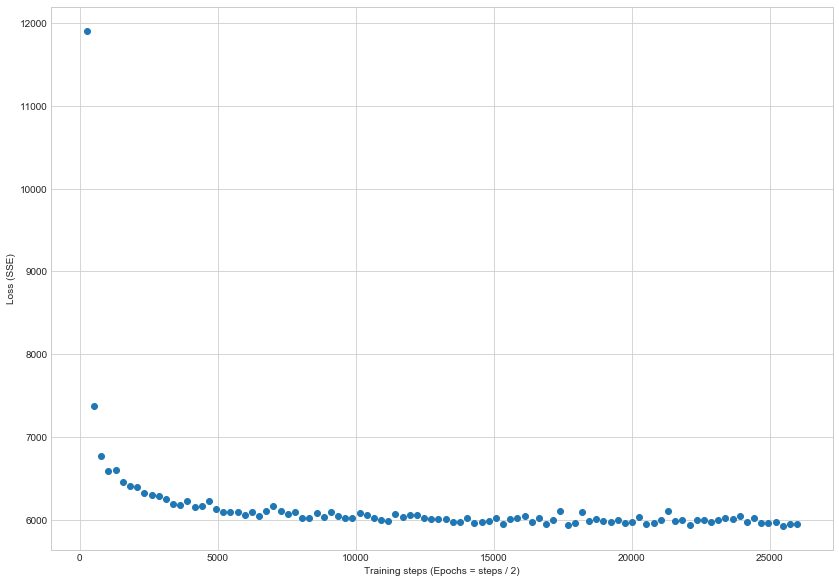

In [67]:
# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps (Epochs = steps / 2)')
plt.ylabel('Loss (SSE)')
plt.show()